<a href="https://colab.research.google.com/github/maryyuliana/INTRODUCCION_AED_MAESTRIA/blob/main/Script_Examen_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN 1 -  Análisis cuantitativo

Integrantes del grupo:
* Mary Yuliana Jaramillo
* Daniel Alejandro Rengifo
* Melina Imbachi
* Juan Fernando Gómez

In [ ]:
! pip install fitter

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 23.3 MB/s eta 0:00:00
  Created wheel for fitter: filename=fitter-1.6.0-py3-none-any.whl size=26054 sha256=e087476e867dd92d680f1b32ab7a44771eb79bcba126eb8c35e1c0e3ce637e04
  Stored in directory: /root/.cache/pip/wheels/26/f9/51/059fcaf0ba5aafd94463e31b343453c5cf165cea425f25c0f9
Successfully built fitter
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
ERROR: pip's depend

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
import statsmodels.api as sm
from scipy.stats import kendalltau, pearsonr, spearmanr, jarque_bera, shapiro,ttest_1samp, kstest, wilcoxon, boxcox
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from fitter import Fitter

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Cargamos todos los archivos necesarios

In [ ]:
### Esta línea descargar los archivos del examen a la carpeta del Colab.
!npx degit HanisDad95/TalleresMSc -f

npx: installed 1 in 1.831s
> destination directory is not empty. Using --force, continuing
> cloned HanisDad95/TalleresMSc#HEAD


In [ ]:
data1 = pd.read_excel('/content/data_exam1.xlsx', sheet_name='data1')
data2 = pd.read_excel('/content/data_exam1.xlsx', sheet_name='data2')
wine_q = pd.read_excel('/content/datos.xls', sheet_name = 'Wine Quality', skiprows = 2)
pub = pd.read_csv("/content/publicidad.csv",sep=',',names=None,index_col=None,skipinitialspace=True)
concrete = pd.read_excel('/content/Concrete_Data.xls')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Punto 1.

Considere el conjunto de datos “data1” del fichero data_exam1.xlsx.



###Punto 1A

Realice un análisis exploratorio de datos ¿Considera que podría generar un modelo de regresión
lineal con variable categórica (sin interacción) para la variable Y? Justifique. Si la
respuesta a la pregunta es SI, genere un modelo de regresión sin interacción e interpretelo.

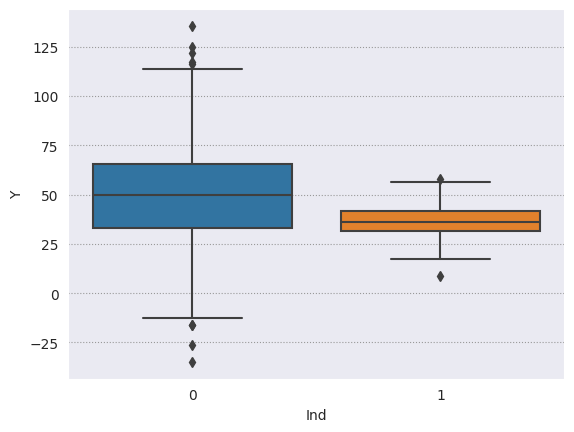

In [ ]:
sns.boxplot(x = data1['Ind'], y = data1['Y'])
plt.show()

En el análisis del comportamiento de la variable dependiente diferenciándola por las categorías de la variable independiente se observa que las medias y las medianas de la variable dependiente son diferentes en los dos grupos.



In [ ]:
#Media de la variable resuesta según categorías de la variable categoríca
media_Ind = data1.groupby('Ind')['Y'].median()
pd.DataFrame(media_Ind)

,Y
Ind,
0,49.562809
1,36.079339


Ahora bien, para saber si se puede correr un modelo
de regresión bajo el contexto planteado, se propone
realizar una prueba de hipótesis para validar si hay relación entre las variables:

**Ho:** No hay correlación entre las variables (**𝜌=0**)

**Ha:** Existe correlación entre las variables (**𝜌≠0**)

En tal sentido, se rechazala hipótesis nula, al comparar el p_value de prueba de correlación de Pearson con un nivel de significancia del 0.05.  Por
lo tanto, la correlación entre las variables es significativa y fuerte.

In [ ]:
from scipy.stats import pearsonr
Coef,vp=pearsonr(data1["Y"],data1["X"])
print(f'Coeficiente de correlación= {Coef}, Valor-p= {vp}')

Coeficiente de correlación= 0.832056778224942, Valor-p= 1.1079584655802099e-257


####**Modelo de Regresión**

Dado que el valor del coficiente de correlación de Pearson es alto, se porcede a estima un modelo sin interacción.

In [ ]:
import statsmodels.api as sm
X = data1[['X','Ind']]
y = data1['Y']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     1566.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          2.25e-308
Time:                        21:07:32   Log-Likelihood:                -3801.1
No. Observations:                1000   AIC:                             7608.
Df Residuals:                     997   BIC:                             7623.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7873      0.984      0.800      0.4

####**Interpretación del modelo de regresión**

*   Bondad de ajuste

    Prob (F-statistic): 2.25e-308 el modelo global es estadísticamente significativo. Tiene capacidad predictiva ya que la variable independiente contribuye significativamente a la predicción de la variable dependiente.

*  R_squared

    Adj. R-squared:0.758, indica que el modelo tine un alto nivel predictivo, la variabilidad de la variable respuesta es explicada en 75.8%

*   P_value

    P-Valor: Sugiere que la variable independiente es significativa al 99% y predice el comportamiento de la variable dependiente.

####**Coeficientes**

*  Coeficiente X= en promedio, un incremento de una unidad en la variable independiente X esta asociado con un incremento de 4.9 unidades en promedio de Y

*  Ind: El coeficiente asociado con la variable 'Ind' es -14.1796 y es altamente significativo (p-value < 0.001). Esto indica que, manteniendo 'X' constante, la categoría 'Ind' se asocia con una disminución promedio de 14.1796 unidades en la variable dependiente en comparación con la categoría de referencia.

* const (intercepto): El coeficiente asociado con la constante (intercepto) es 0.7873, pero no es estadísticamente significativo (p-value = 0.424). Esto sugiere que no hay evidencia suficiente para afirmar que la variable dependiente tiene un valor distinto de cero cuando todas las variables independientes son cero

####**Pruebas de diagnóstico**

*   Durbin -Watson:
    No hay autocorrelación significativa en los residuos, el valor del estadístico se encuentra en el intervalo [1.5 , 2.5]

*   Omnibus:
    La prueba Omnibus no encuentra evidencia significativa de no normalidad en los residuos (p-value = 0.284).

*   Cond. No.:
    El número de condición es 31.7, indicando cierta multicolinealidad.

*   Prob(JB): es 0.295. Dado que este valor es mayor que el nivel de significancia comúnmente utilizado de 0.05, no hay evidencia suficiente para rechazar la hipótesis nula de normalidad de los residuos. En otras palabras, basándonos en el p-valor proporcionado, no hay suficiente evidencia para concluir que los residuos no sigan una distribución normal.

##### Prueba de Shapiro-Wilk / Breusch-Pagan

*  #### Interpretación Shapiro - Wilk:

Hipótesis Nula ($H_0$): La hipótesis nula asume que los residuos siguen una distribución normal.

   Dado que el p-value $(0.3578)$ es mayor que $(0.05)$, no hay suficiente evidencia para rechazar la hipótesis nula. Esto sugiere que los residuos podrían seguir una distribución normal.

* #### Interpretación Breusch-Pagan:

Hipótesis Nula ($H_0)$: La hipótesis nula asume homocedasticidad constante de los residuos (varianza constante).

Dado que el p-value de la pureba es casi cero, al compararlo con el nivel de significancia del 0.05, se rechaza la hipótesis nula de homocedasticidad constante de los residuos.

In [ ]:
from scipy.stats import shapiro
residuos = modelo.resid
stat, p_value = shapiro(residuos)
print(f'p-value de la prueba de Shapiro-Wilk: {p_value}')

p-value de la prueba de Shapiro-Wilk: 0.3578280508518219


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuos = modelo.resid
exog_het = modelo.model.exog
_, p_value, _, _ = het_breuschpagan(residuos, exog_het)
print(f'p-value de la prueba de Breusch-Pagan: {p_value}')

p-value de la prueba de Breusch-Pagan: 9.359043491930456e-15


### *Punto* 1B
Realice un gráfico de dispersión para $Y$ vs $X$, considerando para cada observación su respectivo
valor en la variable Ind ¿Hay evidencia muestral que sugiera un cambio en la tasa media
de cambio de Y condicionado a incrementos unitarios de $X$? ¿Considera que un modelo con
interacciones sería más adecuado? Si la respuesta a estas preguntas es afirmativa, genere el
respectivo modelo, interprete detalladamente los resultados y valide los supuestos del modelo
propuesto.

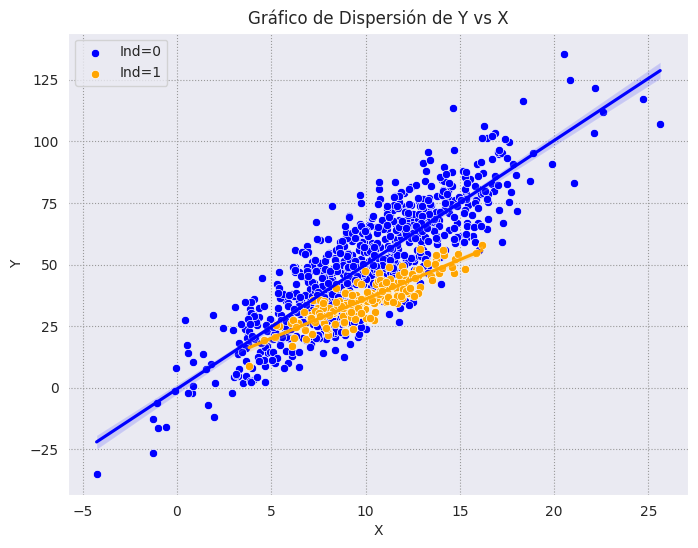

In [ ]:
x_values = data1['X']
y_values = data1['Y']
ind_values = data1['Ind']
data_ind_0 = data1[data1['Ind'] == 0]
data_ind_1 = data1[data1['Ind'] == 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_ind_0['X'], y=data_ind_0['Y'], color='blue', label='Ind=0')
sns.regplot(x=data_ind_0['X'], y=data_ind_0['Y'], scatter=False, color='blue')
sns.scatterplot(x=data_ind_1['X'], y=data_ind_1['Y'], color='orange', label='Ind=1')
sns.regplot(x=data_ind_1['X'], y=data_ind_1['Y'], scatter=False, color='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Dispersión de Y vs X')
plt.legend()
plt.show()

El gráfico de dispersión muestra que la variable $Y$ asume diferentes pendientes cuando se realiza discriminación entre las categoría $0$ o $1$ de la variable independiente, lo que indica que se esta frente a un modelo con interacción, donde la variable categórica afecta el comportamiento de Y. Por lo tanto, la tasa media de cambio de $Y$ ante cambios $X$ es distinta cuando se realiza discriminación de la categórica.

# Modelo con Interacción

In [ ]:
data1['Interaction'] = data1['X'] * data1['Ind']
X_interact = data1[['X','Interaction']]
y = data1['Y']
X_interact = sm.add_constant(X_interact)
modelo_interact = sm.OLS(y, X_interact).fit()
print(modelo_interact.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     1620.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          6.34e-314
Time:                        21:07:33   Log-Likelihood:                -3788.2
No. Observations:                1000   AIC:                             7582.
Df Residuals:                     997   BIC:                             7597.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.1611      0.964     -0.167      

####**Interpretación del modelo de regresión**


*  Bondad de ajuste del modelo   F-statistic: El valor del estadístico F es 1620, y el p-value asociado es extremadamente pequeño (6.34e-314), indicando que al menos una de las variables predictoras es significativa en la predicción de 'Y'.

* R-squared: El R-squared es 0.765, significa que aproximadamente el 76.5% de la variabilidad en la variable dependiente $(Y)$ puede ser explicada por las variables predictoras incluidas en el modelo. En otras palabras, el modelo captura y explica alrededor del 76.5% de la variación total en los datos.

* Adj. R-squared: El R-squared ajustado es 0.764, que tiene en cuenta el número de predictores en el modelo.

### Coeficientes:

* const (intercepto): El coeficiente asociado con el intercepto es -0.1611, pero no es estadísticamente significativo (p-value = 0.867). Esto sugiere que no hay evidencia suficiente para afirmar que el valor medio de 'Y' es diferente de cero cuando todas las demás variables son cero.

* X: El coeficiente asociado con 'X' es 5.0120,  es estadísticamente significativo (p-value < 0.05). Indica que, manteniendo constante la variable 'Interaction', un incremento de una unidad en 'X' se asocia con un aumento de 5.0120 unidades en 'Y'.

*Interaction: El coeficiente asociado con 'Interaction' es -1.4219, y también es estadísticamente significativo (p-value < 0.05). Esto sugiere que hay un efecto de interacción entre 'X' e 'Ind'. El valor negativo indica que la relación entre 'X' e 'Y' se modifica por la presencia de 'Ind'.

####**Pruebas de Diagnóstico:**

* Prob(Omnibus): 0.137, que es mayor que 0.05, por lo que se acepta la hipotsis nula de que todas las medias poblacionales son iguales.

* Prob(JB): 0.109, indica la probabilidad asociada al valor JB bajo la hipótesis nula de que los residuos siguen una distribución normal. En este contexto, un p-value mayor comparado con un nivel de significancia predeterminado (como 0.05) sugiere que no hay suficiente evidencia para rechazar la hipótesis nula.

* Durbin-Watson: 1.986, cerca de 2, sugiriendo que no hay una autocorrelación sustancial en los residuos.

* Shapiro-Wilk
Hipótesis Nula (H0): La hipótesis nula asume que los residuos siguen una distribución normal.
Resultado de la Prueba: Dado que el p-value (0.0215) es menor que el nivel de significancia de 0.05, hay evidencia suficiente para rechazar la hipótesis nula. Esto sugiere que los residuos no siguen una distribución normal.

* Breusch-Pagan

Hipótesis Nula (H0): La hipótesis nula asume homocedasticidad, es decir, que la varianza de los residuos es constante.
Resultado de la Prueba: Dado que el p-value es prácticamente cero, se rechaza la hipótesis nula. Esto sugiere que hay heterocedasticidad en los residuos.

In [ ]:
from scipy.stats import shapiro
residuos = modelo_interact.resid
stat, p_value = shapiro(residuos)
print(f'p-value de la prueba de Shapiro-Wilk: {p_value}')

p-value de la prueba de Shapiro-Wilk: 0.02152867242693901


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuos = modelo_interact.resid
exog_het = modelo_interact.model.exog
_, p_value, _, _ = het_breuschpagan(residuos, exog_het)
print(f'p-value de la prueba de Breusch-Pagan: {p_value}')

p-value de la prueba de Breusch-Pagan: 4.205804595796627e-18


##Punto 2

### Punto 2A
Realice un análisis exploratorio de datos, tanto univariante como bivariante ¿Qué puede decir
acerca del comportamiento distribucional de cada variable? ¿Considera que la dispersión bivariante
da indicios para generar un modelo de regresión para $Y$? Justifique detalladamente.

In [ ]:
df = data2
data2.describe()

,Y,X
count,1000.000000,1.000000e+03
mean,9.445622,7.234805e-02
std,3.908189,9.753985e-02
min,-12.073239,1.343729e-08
25%,7.411486,8.450417e-03
50%,10.072134,3.655172e-02
75%,12.082546,9.992523e-02
max,17.838788,9.397465e-01


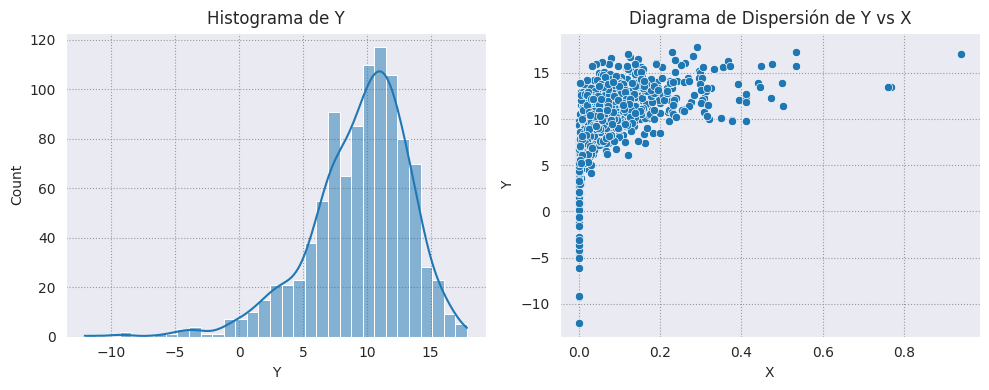

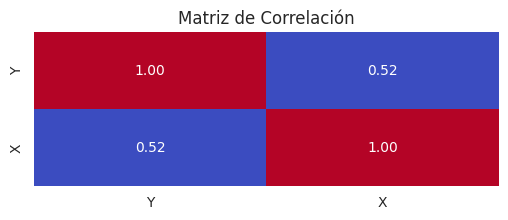

In [ ]:
# Análisis Exploratorio
df = pd.DataFrame(data2)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['Y'], kde=True)
plt.title('Histograma de Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x='X', y='Y', data=df)
plt.title('Diagrama de Dispersión de Y vs X')

plt.tight_layout()
plt.show()

correlation_matrix = df[['Y', 'X']].corr()
plt.figure(figsize=(6, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar = False)
plt.title('Matriz de Correlación')
plt.show()

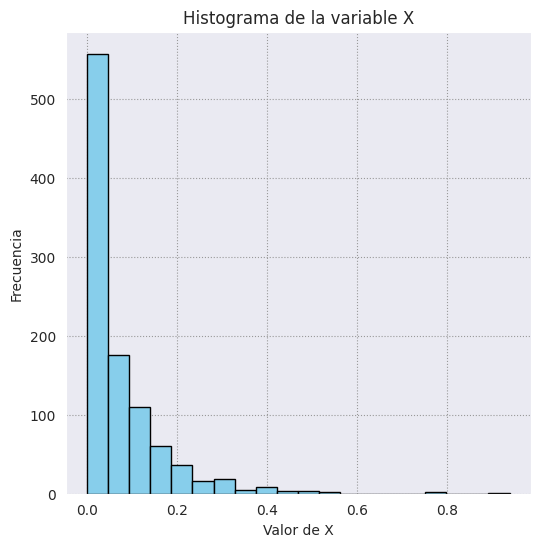

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(df['X'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable X')
plt.xlabel('Valor de X')
plt.ylabel('Frecuencia')
plt.show(close=None, block=None)

#### **Justificación:**

Después de realizar el análisis univariado y bivariado se observa gráficamente que no existe de una relación lineal entre las variables, por lo cual  plantear un modelo de regresión lineal, no sería la mejor alternativa para modelar la relación entre la variable $Y$ y $X$. Adicionalmente el sesgo en las variables puede afectar la apariencia de la relación lineal. Por lo tanto, habría que explorar diferentes enfoques, incluidas transformaciones de variables y modelos no lineales.

###Punto 2B
De acuerdo al análisis del ítem anterior proponga una transformación (raiz, potencia, logarítmica,
sinusoidal, etc.) para alguna de las variables y justifique por qué. Dado lo anterior, proponga un modelo de regresión lineal, interpretelo y valide los supuestos del modelo.


###Tranformación Box - cox
Está metodología es empleada para realizar la transformación de variables que no tiene una distribución normal en una con aparencia mas normal. El objetivo es encontrar un valor de lamda óptimo, que al tranformar los datos de acuerdo con la ecuación (1), se parezcan más a una distribució normal

**Ecuación (1)**

y(λ) = (yλ – 1) / λ si y ≠ 0

y(λ) = log(y) si y = 0

###Transformación Yeo-johnson

La transformación Yeo-Johnson permite también valores cero y negativos de y



In [ ]:
data2.head()

,Y,X
0,12.189142,0.226957
1,12.187456,0.088938
2,11.782692,0.199069
3,5.732032,0.003812
4,7.026970,0.004573


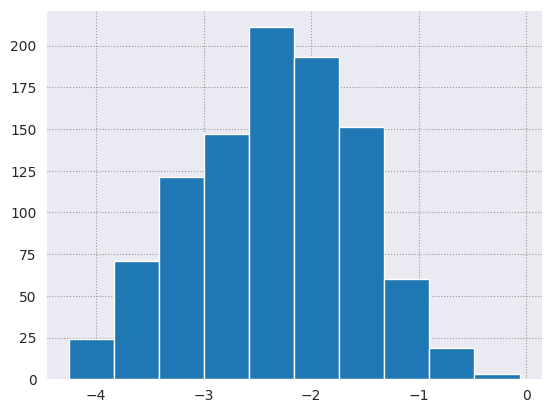

In [ ]:
# Perform Box-Cox transformation on 'X'
X_transf, best_lambda_x = boxcox(data2['X'])
plt.hist(X_transf)
plt.show()


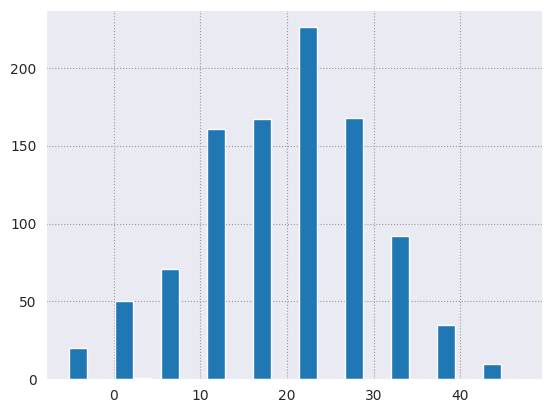

In [ ]:
#Transformacón
from scipy.stats import yeojohnson
Y_transf = yeojohnson(data2['Y'])
plt.hist(Y_transf)
plt.show()

In [ ]:
X_t = pd.DataFrame(X_transf)

In [ ]:
Y_t = pd.DataFrame(Y_transf[0])

In [ ]:
## Modelo con las variables  transformadas por el método Box-Cox y Yeo - Johnson
X_t = sm.add_constant(X_t)
modelo_tra = sm.OLS(Y_t, X_t).fit()
print(modelo_tra.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     1706.
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          3.24e-218
Time:                        21:07:36   Log-Likelihood:                -3206.8
No. Observations:                1000   AIC:                             6418.
Df Residuals:                     998   BIC:                             6427.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.0287      0.615     73.204      0.0

### **Interpretación del modelo lineal**

#### Bondad de Ajuste:

* R-squared y Adj. R-squared: Estos valores (0.
631 respectivamente) indican que el modelo explica el 63.1 de la variabilidad de la variable transformada $Y$ en terminos de la variable transformada $X$

* Prob (F-statistic): Este valor aproximadamente cero,  sugiere que el modelo es estadísticamente significativo

### Coeficientes:

* const: El coeficiente asociado con la constante (intercepto) es 45.0287. Esto significa que cuando la variable transformada de X es cero, el valor el logaritmo natural de Y es esperado que sea 45.0287.

* X_transf: El coeficiente asociado con la variable transformada X es de $10.31$ Esto significa que un aumento de una unidad en
la variable transformada de  $X$,  está asociado, en promedio, con un aumento de $10.31$ unidades en la variable transformada Y.

### **Validación de los supuestos de los errores del modelo**

* Autorcorrelación de los errores

Durbin-Watson: Este estadístico prueba la autocorrelación de los residuos, se encuentra en el intervalo $1.5 <= DW <= 2.5$, lo sugiere que no hay autocorrelación significativa.

* Normalidad de los errores

Jarque-Bera (JB): Comparando el p_value de esta prueba con el nivel de significancia de 0.05, se rechaza la $H_0$, es decir, los residuos no siguen una distribución normal.

* Media cero

El p_value del test de Wilcoxon es mayor comparado con un nivel de signficancia de 0.05, por lo tanto los residuos tienen media cero

* Homocedasticidad de los residuos

De acuerdo con el  test de Breush- Pagan, los residuos del modelo no son homocedasticos, el p_value de la prueba es menor comparado con un nivel de significacia de 0.05.





In [ ]:
res_mod_t = modelo_tra.resid
from scipy.stats import wilcoxon
test_wilcoxon = wilcoxon(res_mod_t)
test_wilcoxon.statistic, test_wilcoxon.pvalue

(243582.0, 0.4654541218957373)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

### H0: E_i son homocedasticos
### H1: E_i no son homocedasticos (Son heterosedasticos)
test = sms.het_breuschpagan(modelo_tra.resid, modelo_tra.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)



[('Lagrange multiplier statistic', 21.335254833409035),
 ('p-value', 3.8557498457695e-06),
 ('f-value', 21.756770568166075),
 ('f p-value', 3.5157597765920685e-06)]

# Punto 3

In [ ]:
wine_q = pd.read_excel('/content/datos.xls', sheet_name = 'Wine Quality', skiprows = 2)

In [ ]:
wine_q.columns

Index(['Calidad del Vino', 'Acidez Fija', 'Acidez Volátil', 'Ácido Cítrico',
       'Azúcar Residual', 'Cloruros', 'Dióxido de Azúfre Libre',
       'Dióxido de Azúfre Total', 'Densidad', 'pH', 'Sulfatos', 'Alcohol'],
      dtype='object')

In [ ]:
wine_q.drop(labels = ['Cloruros', 'Calidad del Vino','pH', 'Sulfatos','Acidez Volátil', 'Acidez Fija'], axis = 1, inplace = True)

### Punto 3A
Estandarice las variables y calcule las matrices de correlaciones de Peason, Sperman y Kendall

Se define la función para estandarizar y se aplica al dataset.

In [ ]:
def Estandarizar(df, columna):
    return (df[columna] - df[columna].mean())/df[columna].std()

vbles_estand = pd.DataFrame(Estandarizar(wine_q, i) for i in wine_q.columns).T

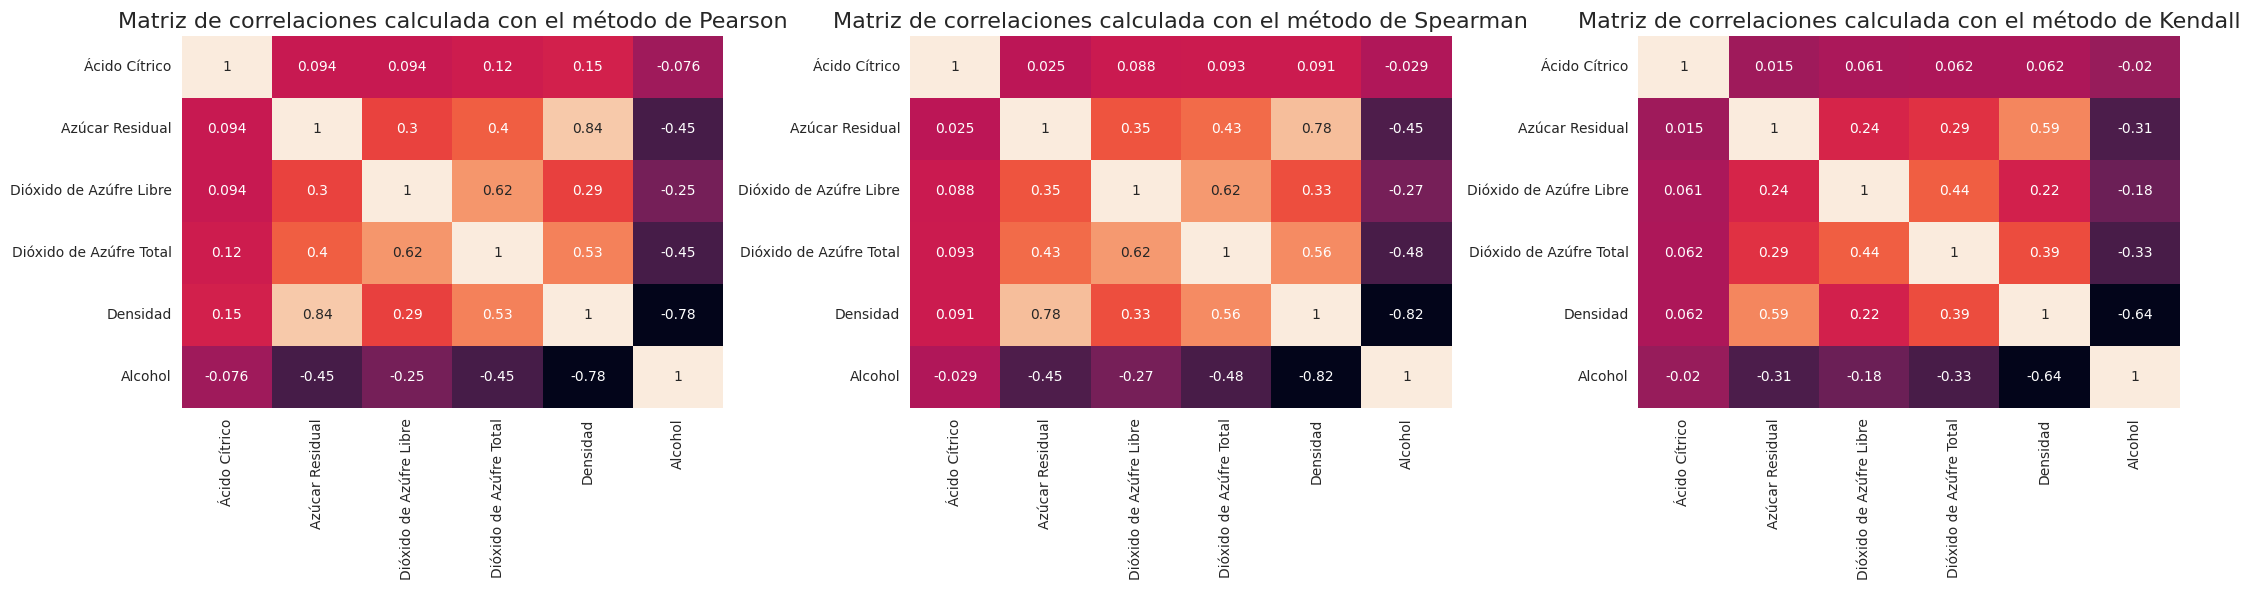

In [ ]:
f1 = plt.figure(figsize = (22,6))
for i, j in enumerate(['pearson','spearman','kendall']):
    f1.add_subplot(1,3, i + 1)
    sns.heatmap(vbles_estand.corr(method=j), annot = True, cbar = False)
    plt.title(f'Matriz de correlaciones calculada con el método de {j.capitalize()}', size = 16)
plt.tight_layout()

En las matrices de correlación no se observa una diferencia marcada ni de signo de la relación ni de magnitud, donde la mayoría de correlaciones son de menor magnitud por el método de Kendall comparada con las matrices de correlaciones por los métodos de Spearman y Pearson.

### Punto 3B
Realice una partición de los datos tipo 80–20, donde el primer 80% de los datos es una muestra de entrenamiento y el restante 20% una muestra de prueba/predicción.
Luego, construya 3 modelos RLM con las matrices estimadas en el primer ítem . Compare e interprete los valores de los coeficientes de regresión obtenidos por cada método.

Se particionan los datos, siendo el 80% para entrenamiento y el 20% de prueba.

In [ ]:
train = vbles_estand.sample(frac = 0.8, random_state = 123)
test = vbles_estand[~(vbles_estand.index.isin(train.index))]

Se verifica que hayan quedado particionados con la proporción esperada

In [ ]:
train.shape,test.shape

((3918, 6), (980, 6))

In [ ]:
x_train = train.drop('Densidad', axis = 1)
y_train = train['Densidad']
x_test = test.drop('Densidad', axis = 1)
y_test = test['Densidad']

Se guardan las matrices de correlación estimdas por los 3 métodos.

In [ ]:
cov_pear,cov_sp,cov_kend = [train.corr(method = i) for i in ('pearson','spearman','kendall')]

xx_pearson = cov_pear.drop('Densidad', axis = 1).drop('Densidad', axis = 0).values
xy_pearson = cov_pear.values

xx_spearman = cov_sp.drop('Densidad', axis = 1).drop('Densidad', axis = 0).values
xy_spearman = cov_sp.values

xx_kendall = cov_kend.drop('Densidad', axis = 1).drop('Densidad', axis = 0).values
xy_kendall = cov_kend.values

> Calcular los $\hat{\beta}$
>  * $\hat{\beta} = \Sigma{xx}^{-1} * \Sigma{xy} $

In [ ]:
betas_pears = np.linalg.inv(xx_pearson) @ xy_pearson[4, np.array([True, True, True, True, False, True])]
betas_spearman = np.linalg.inv(xx_spearman) @ xy_spearman[4, np.array([True, True, True, True, False, True])]
betas_kendall = np.linalg.inv(xx_kendall) @ xy_kendall[4, np.array([True, True, True, True, False, True])]

Calcular el intercepto $\hat{\beta_0} = \hat{\mu_y} - \hat{\mu_x}\hat{\beta_i}$

In [ ]:
μ_x = train.drop(labels = 'Densidad', axis = 1).mean(axis = 0).values ## Media de las variables independientes. Dimensión (p x 1)
μ_y = train['Densidad'].mean() ## Media de la variable dependiente. Dimensión (1 x 1)

In [ ]:
β0_pearson = μ_y - np.dot(μ_x, betas_pears)
β0_spearman = μ_y - np.dot(μ_x, betas_spearman)
β0_kendall = μ_y - np.dot(μ_x, betas_kendall)
## Juntamos  los β0 con los βi en el mismo arreglo
betas_pears = np.insert(betas_pears,0,β0_pearson)
betas_spearman = np.insert(betas_spearman,0,β0_spearman)
betas_kendall = np.insert(betas_kendall,0,β0_kendall)

Se construye el DataFrame con todos los $\hat{\beta}$ estimados, con las tres matrices de correlaciones.

In [ ]:
betas_df = pd.DataFrame([betas_pears, betas_spearman, betas_kendall], index = ['B_pearson','B_spearman', 'B_kendall']).T
betas_df.set_index([[ 'const','Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre', 'Dióxido de Azúfre Total', 'Alcohol']], inplace = True)
betas_df

,B_pearson,B_spearman,B_kendall
const,0.001124,0.001755,0.001814
Ácido Cítrico,0.052103,0.060218,0.041865
Azúcar Residual,0.601873,0.506056,0.415856
Dióxido de Azúfre Libre,-0.082526,-0.078564,-0.022271
Dióxido de Azúfre Total,0.120635,0.123224,0.119795
Alcohol,-0.465895,-0.555561,-0.470409


Del los coeficientes calculado, se realiza la descripción de los betas de Pearson, esta interpretación aplica tambien para los $\hat{\beta}$ estimados con la matrices de correlaciones de Sperman y Kendall, debido a que solo se presentan cambios en  los pesos de los coeficientes.

* Ácido cítrico : Por un incremento en una unidad del ácido cítrico, manteniendo las demás variables constantes, se espera que la densidad incremente en promedio 0.05 unidades.
* Azúcar residual : Por un incremento en una unidad en el azúcar residual, manteniendo las demás variables constantes, se espera que en promedio la densidad aumente 0.6 unidades.
* Dióxido de azúfre libre :  Por un incremento en una unidad en el dióxido de azúfre libre, manteniendo las demás variables constantes, se espera que en promedio la densidad disminuya 0.08 unidades.
* Dióxido de azúfre total : Por un incremento en una unidad en el dióxido de azúfre total, manteniendo las demás variables constantes, se espera que en promedio la densidad incremente 0.12 unidades.
* Alcohol : Por un incremento en una unidad en el alcohol, manteniendo las demás variables constantes, se espera que en promedio la densidad disminuya 0.46 unidades.

### Punto 3C
Realice una predicción con los datos de prueba de acuerdo a los modelos ajustados y calcule el RMSE de la predicción ¿Cuál de los modelos lineales propuestos predice mejor?

In [ ]:
## Se le añade la constante al conjunto de prueba
X_test = sm.add_constant(x_test)

Se calculan  $\hat{y}$, posteriormente los errores $\hat{\epsilon_i} = (y_i - \hat{y_i})$, y el RMSE.

In [ ]:
predict_pears = np.dot(X_test.values, betas_pears)
ϵ_pearson = y_test - predict_pears
RMSE_pears = np.sqrt(((ϵ_pearson)**2).mean())

predict_spearman = np.dot(X_test.values, betas_spearman)
ϵ_spearman = y_test - predict_spearman
RMSE_spearman = np.sqrt(((ϵ_spearman)**2).mean())

predict_kendall = np.dot(X_test.values, betas_kendall)
ϵ_kendall = y_test - predict_kendall
RMSE_kendall = np.sqrt(((ϵ_kendall)**2).mean())

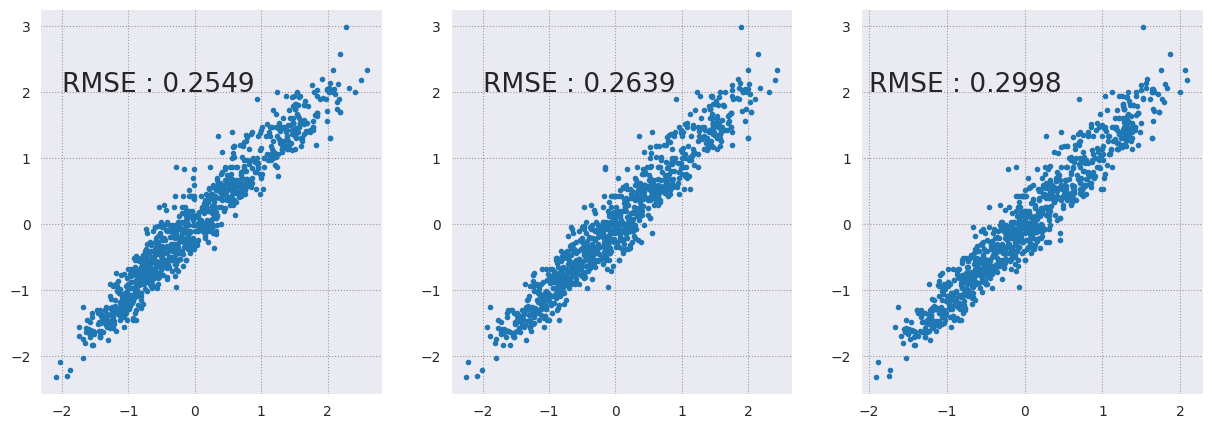

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,5))
ax1.plot(predict_pears, y_test, '.')
ax1.text(-2,2,f'RMSE : {round(RMSE_pears,4)}',fontsize = 19)
ax2.plot(predict_spearman, y_test, '.')
ax2.text(-2,2,f'RMSE : {round(RMSE_spearman,4)}',fontsize = 19)
ax3.plot(predict_kendall, y_test, '.')
ax3.text(-2,2,f'RMSE : {round(RMSE_kendall,4)}',fontsize = 19)
plt.show()

Con base en el RMSE, se escoge el modelo que tenga un menor valor en esta métrica, la mejor predicción la hace el modelo calculado con la correlación de Pearson.

### Punto 3D
Valide los supuestos del modelo

* Autocorrelación

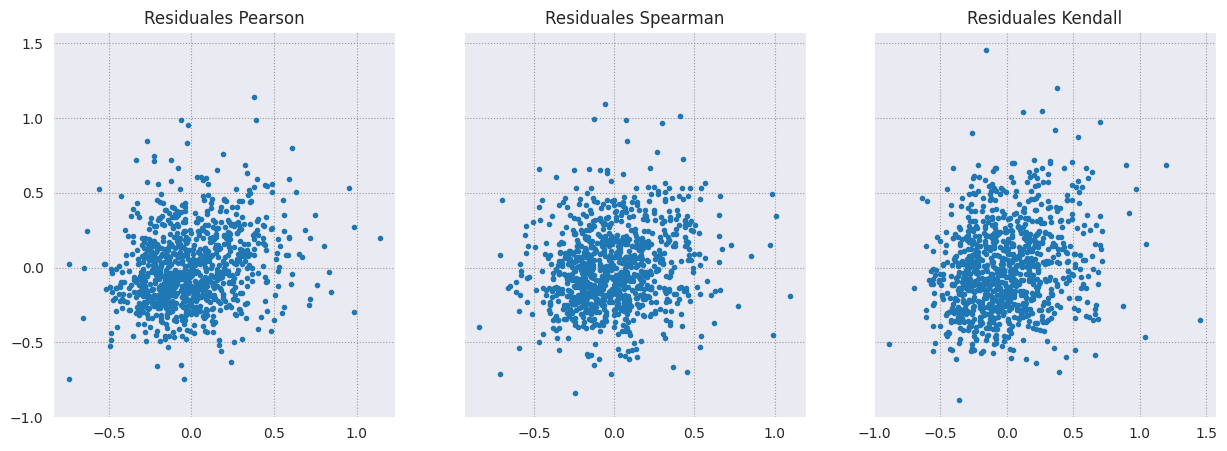

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15,5), sharey = True)
axes[0].plot(ϵ_pearson[1:],ϵ_pearson[:-1],'.')
axes[0].set_title('Residuales Pearson')
axes[1].plot(ϵ_spearman[1:],ϵ_spearman[:-1],'.')
axes[1].set_title('Residuales Spearman')
axes[2].plot(ϵ_kendall[1:],ϵ_kendall[:-1],'.')
axes[2].set_title('Residuales Kendall')
plt.show()

In [ ]:
durbin_watson(ϵ_pearson), durbin_watson(ϵ_spearman), durbin_watson(ϵ_kendall)

(1.546915750995907, 1.6642629871304684, 1.5787780298672145)

* Normalidad

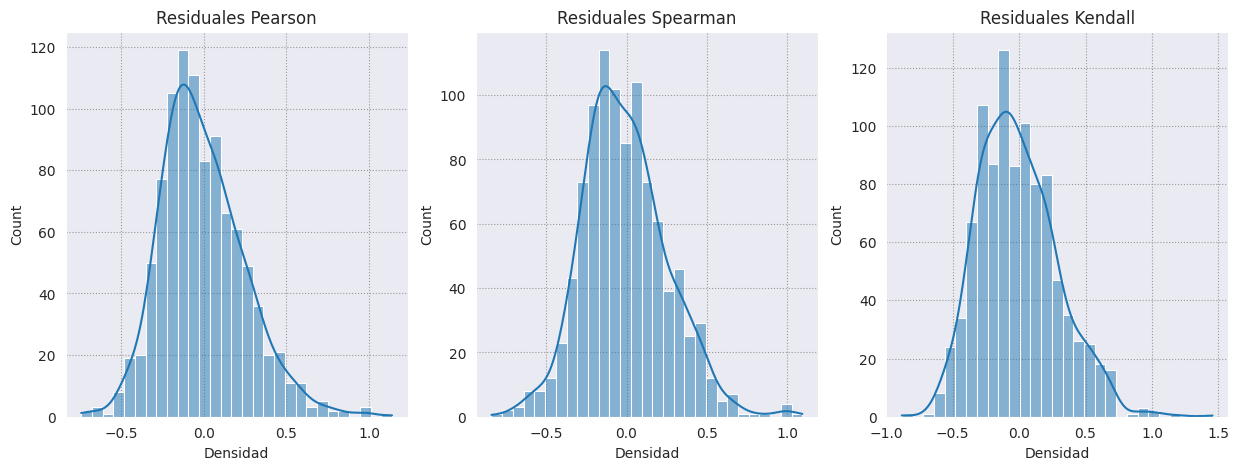

In [ ]:
fig, axes = plt.subplots(1,3, figsize = (15,5))
sns.histplot(ϵ_pearson, ax = axes[0], kde = True)
axes[0].set_title('Residuales Pearson')
sns.histplot(ϵ_spearman, ax = axes[1], kde = True)
axes[1].set_title('Residuales Spearman')
sns.histplot(ϵ_kendall, ax = axes[2], kde = True)
axes[2].set_title('Residuales Kendall')
plt.show()

In [ ]:
print(f'Pearson : {ttest_1samp(ϵ_pearson, popmean = 0)[1]}')
print(f'Spearman : {ttest_1samp(ϵ_spearman, popmean = 0)[1]}')
print(f'Kendall : {ttest_1samp(ϵ_kendall, popmean = 0)[1]}')

Pearson : 0.4906883123530119
Spearman : 0.29817958776898024
Kendall : 0.3441196674586807


In [ ]:
print(f'Pearson : {jarque_bera(ϵ_pearson)[1]}')
print(f'Spearman :{jarque_bera(ϵ_spearman)[1]}')
print(f'Kendall : {jarque_bera(ϵ_kendall)[1]}')


Pearson : 3.9728923195461425e-24
Spearman :1.1661010810344602e-13
Kendall : 2.7934086927010335e-18


De acuerdo con el test de Jarque-Bera, se rechaza la $H0 = \hat{\epsilon_i} \sim N (\hat{\sigma},\hat{\mu}) $ en los 3 casos por lo que los errores no se distribuyen normalmente.

* Homocedasticidad

In [ ]:
print('Pearson:',sm.stats.diagnostic.het_breuschpagan(ϵ_pearson, X_test)[-1]) ## el p_value es el último valor
print('Spearman:',sm.stats.diagnostic.het_breuschpagan(ϵ_spearman, X_test)[-1]) ## el p_value es el último valor
print('Kendall:',sm.stats.diagnostic.het_breuschpagan(ϵ_kendall, X_test)[-1]) ## el p_value es el último valor

Pearson: 9.716878866130835e-09
Spearman: 5.210828230880781e-10
Kendall: 1.8309743851571793e-05


Con base en las pruebas estadísticas y gráficas mostradas en las anteriores celdas, los 3 modelos cumplen el supuesto de no autocorrelación serial en los residuales, ninguno de los residuales de los 3 modelos cumplen el supuesto de normalidad ni el de homocedasticidad. Por lo cual estos modelos no son confiables para realizar predicciones

### Punto 3F
Realice un análisis del diagrama de dispersión del conjunto de datos ¿Se evidencian comportamientos totalmente lineales? Si la respuesta es negativa, sugiera y realice transformaciones
de variables y justifique el por qué de esa transformación. Finalmente, genere un modelo RLM e interprételo detalladamente.

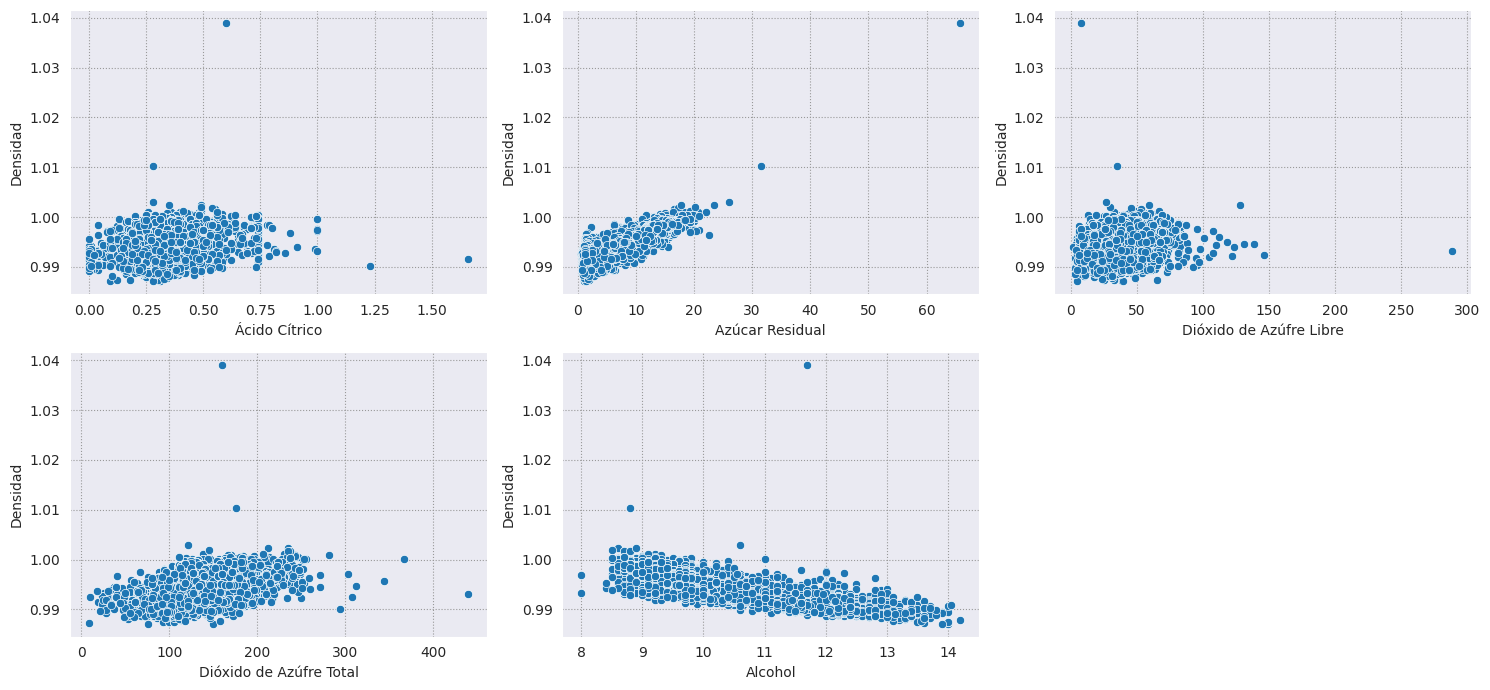

In [ ]:
f = plt.figure(figsize = (15,7))
for i,j in enumerate(['Ácido Cítrico', 'Azúcar Residual', 'Dióxido de Azúfre Libre','Dióxido de Azúfre Total', 'Alcohol']):
    f.add_subplot(2,3,i + 1)
    sns.scatterplot(data = wine_q, y = 'Densidad', x = j)
    plt.tight_layout()
plt.show()

* Densidad vs Alcohol : Sí se observa un comportamiento lineal entre estas dos variables
* Densidad vs Dióxido de Azúfre Total : Sí se observa un comportamiento lineal entre estas dos variables
* Densidad vs Azúcar Residual : Sí se observa un comportamiento lineal entre estas dos variables

* Se propone revisar la transformación de las variables para las cuales no se observa comportamientos totalmente lineales, las cuales son Ácido Cítrico y Dióxido de Azúfre Libre

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  # take this path if there are no kwargs


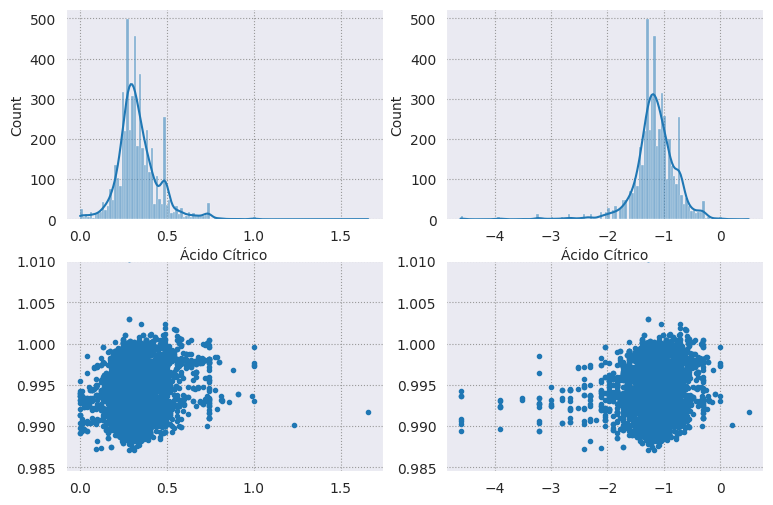

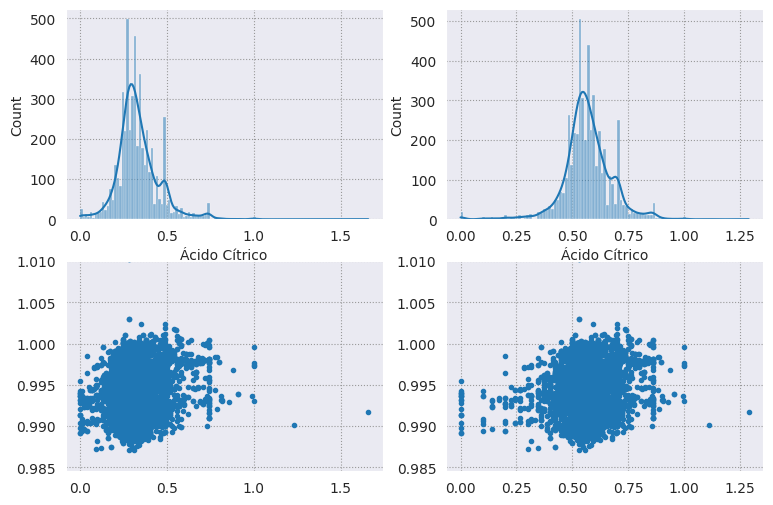

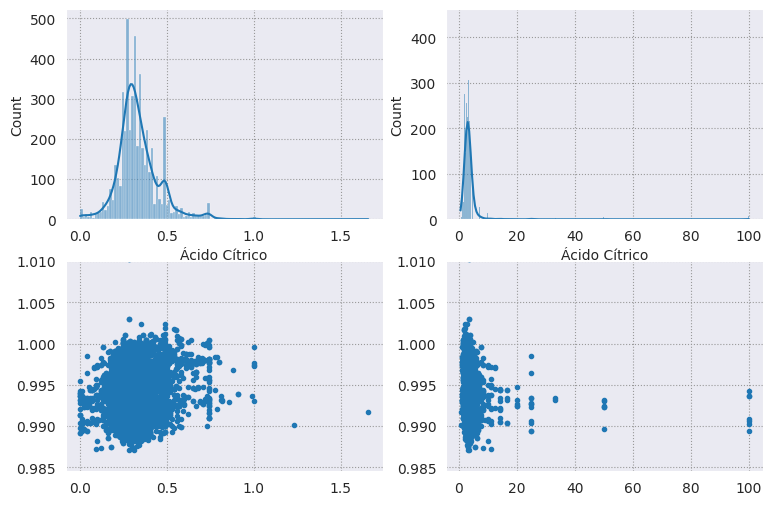

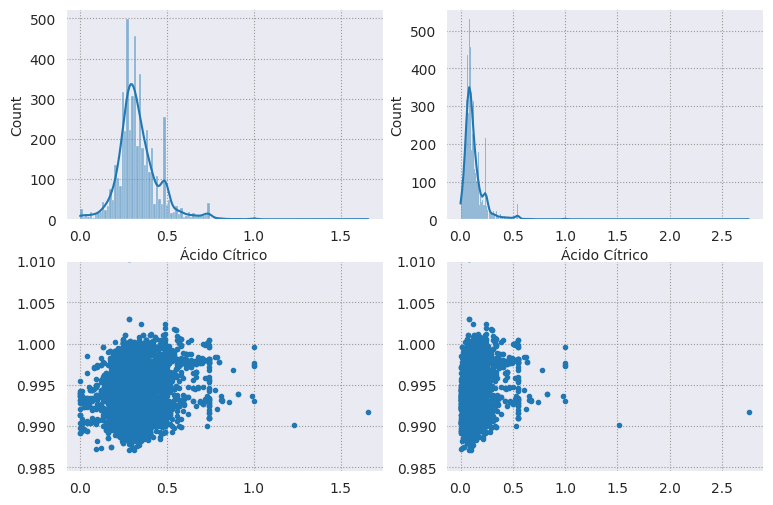

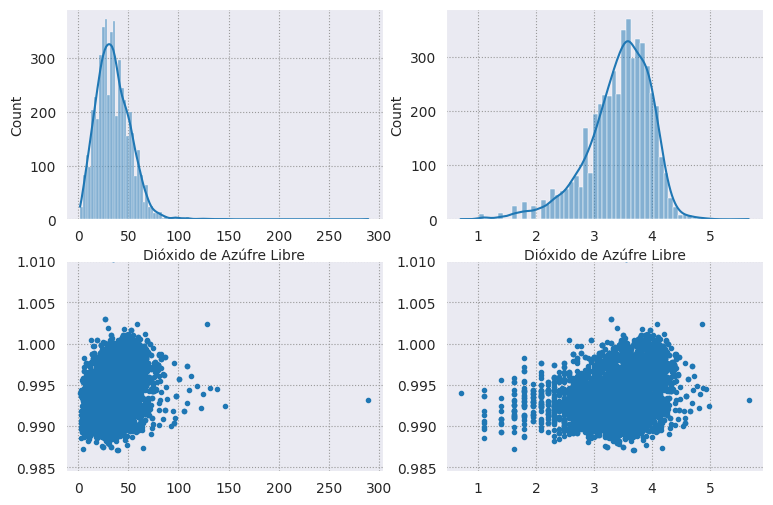

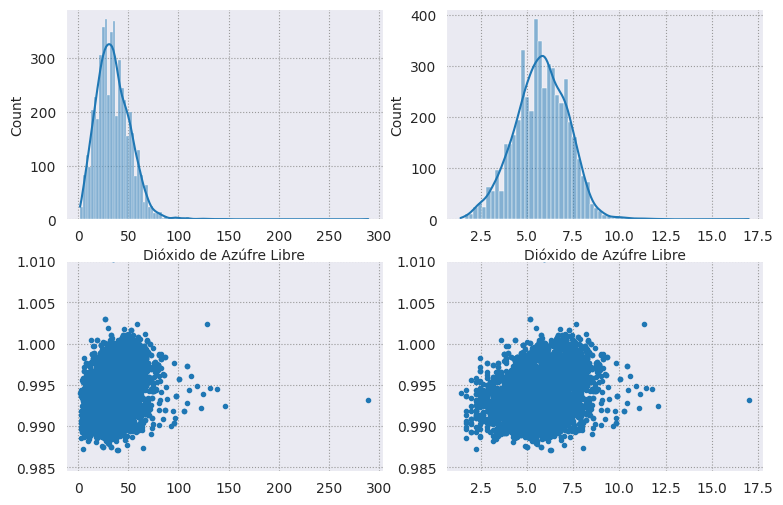

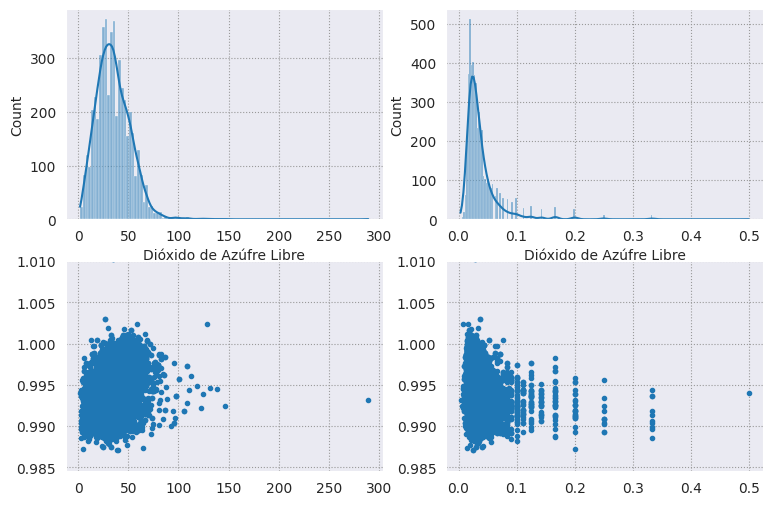

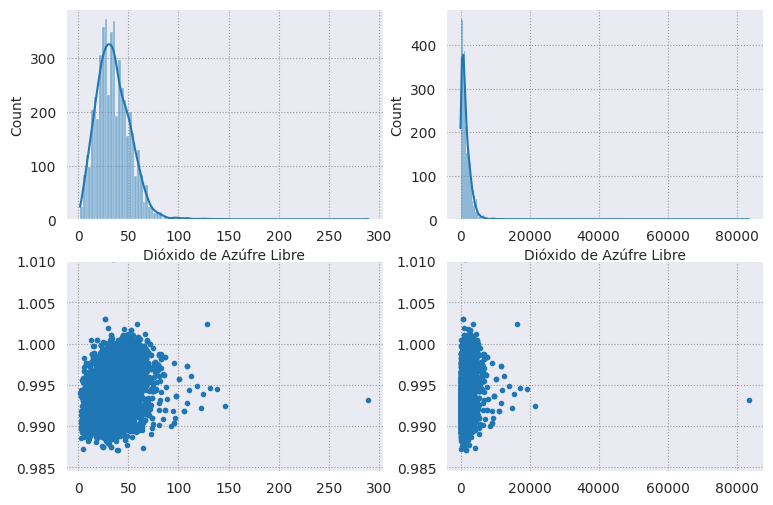

In [ ]:
for i in ['Ácido Cítrico', 'Dióxido de Azúfre Libre']:
    p = wine_q[i]
    transformaciones = [np.log(p), np.sqrt(p), 1/p, p**2]
    for j in transformaciones:
        fig, (axes0, axes1) = plt.subplots(2,2, figsize = (9,6))
        sns.histplot(p, kde = True, ax = axes0[0])
        sns.histplot(j, kde = True, ax = axes0[1])
        axes1[0].plot(p,wine_q['Densidad'],'.')
        axes1[0].set_ylim(top = 1.01)
        axes1[1].plot(j,wine_q['Densidad'],'.')
        axes1[1].set_ylim(top = 1.01)

Con las  transformaciones propuestas no se logra establecer una relación lineal entre la variable respuesta y el Ácido Cítrico y el Dióxido de Azúfre Libre. Se procede a estimar un modelo de RLM sin incluir estas dos variables

In [ ]:
x = wine_q.drop(labels = ['Densidad','Ácido Cítrico','Dióxido de Azúfre Libre'], axis = 1)
y = wine_q['Densidad']
X = sm.add_constant(x)
modelo_punto3 = sm.OLS(y, X)
resultados_punto3 = modelo_punto3.fit()
print(resultados_punto3.summary())

                            OLS Regression Results                            
Dep. Variable:               Densidad   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                 1.674e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        21:08:08   Log-Likelihood:                 27448.
No. Observations:                4898   AIC:                        -5.489e+04
Df Residuals:                    4894   BIC:                        -5.486e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [ ]:
sm.stats.diagnostic.het_breuschpagan(resultados_punto3.resid, X)[-1]

1.3396915901957473e-39

Del resumen que muestra la estimación del modelo se encuentra que:

* Las variables independientes son capaces de explicar un 91% de la variabilidad del la Densidad.
* Los coeficientes de las variables escogidas en conjunto son significativos para la explicación de la Densidad (Prob F-statistic)
* Todos los coeficientes de las variables son significativos individualmente.
* Con respecto a la validación de los supuestos de los residuales del modelo se observa que no se cumple los supuestos de independencia de los errores, nomalidad y varianza constante u homocedasticidad de los errores.

##Punto 4
Se tiene un conjunto de datos que registra la cantidad de anuncios publicitarios en redes sociales que realiza una empresa y su correspondiente retorno de inversión en ventas. Se desea determinar si existe una relación lineal significativa entre la cantidad de anuncios publicitarios y el retorno de inversión.

In [ ]:
#Cargar los datos
pub = pd.read_csv("/content/publicidad.csv",sep=',',names=None,index_col=None,skipinitialspace=True)

In [ ]:
pub.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
pub.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
pub = pub.drop("Unnamed: 0",axis=1)

###Punto 4A
Graficar el retorno de inversión (variable “Sales”) vs la cantidad de anuncios publicitarios
por canal (“TV”, “Radio”, “Newspaper”). Para ello use la función scatter_matrix() del paquete
pandas e interprete los graficos de las variables dos a dos, teniendo en cuenta que nuestra
variable respuesta es “Sales”.


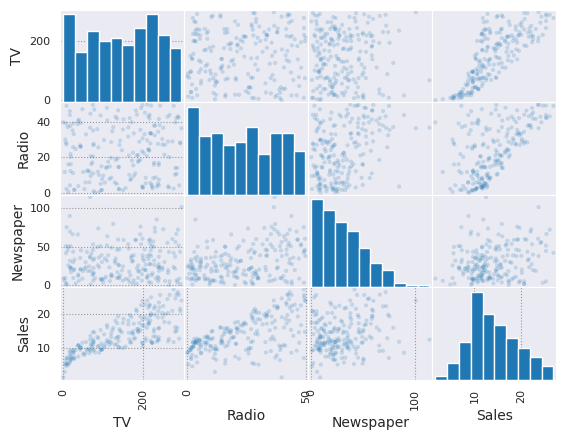

In [ ]:
## 1. Gráficar la variable respuesta vs las variables predictoras
pd.plotting.scatter_matrix(pub, alpha=0.2)
plt.show()

####Interpretación del gráfico

* Sales vs Newspaper: En el gráfico se observa que no existen patrones de relación y dependencia entre las variables, los datos
se encuentran dispersos entre los valores de la variable newspaper y Sales. Adicionalmente, se observa una concentración de los valores de las ventas cuando el de Newspaper es menor a 50.

* Sales vs Radio: La correlación entre las dos variables se observa directamente proporcional, es decir, que a incrementos en una unidad de la variable Radio, tambien incrementa la variable Sales. Sin embargo, no se puede afirmar claramente que sea una relación lineal.

* Sales vs TV: Entre estas dos varibles se observa una correlación positiva y de una manera mas clara que la anterior comparación, la correlación no es lineal.

####Punto 4B
Calcular el coeficiente de correlación entre todas las variables y mediante un mapa de calor
represente estas correlaciones. ¿Interprete las estructuras de dependencia encontradas?

### Interpretación de las estructuras de dependencia:

Dando continuidad a lo observado en los gráficos de dispersión de la variable dependiente Sales versus las variables independientes (Newspaper, Radio, TV); en el gráfico de calor de las correlaciones se observa que entre las ventas y la publicidad por televisión tienen una correlación alta al ser un valor por encima de $0.7$. Mientras que, entre las ventas y la publicidad en radio es moderada. Por último, como se visualizó en el scatter plot de las ventas y la publicidad en períodicos la correlación es débil.

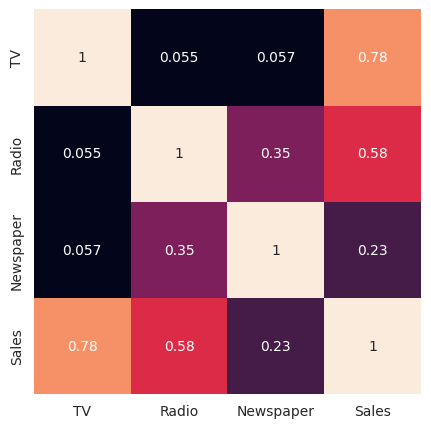

In [ ]:
#2 Calcular el coeficiente de correlación mediante un mapa de calor

plt.figure(figsize=(5,5))
sns.heatmap(pub.corr(), annot = True,  cbar = False)
plt.show()

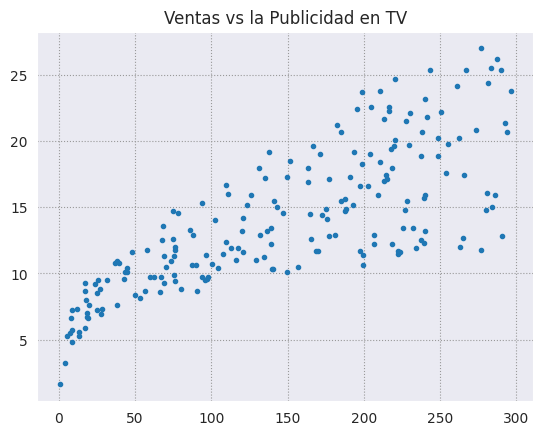

In [ ]:
Sales = pub["Sales"]
TV = pub["TV"]
plt.plot(TV, Sales, ".")
plt.title("Ventas vs la Publicidad en TV")
plt.show()

####Punto 4C
Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o
“Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de
regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente
de determinación R2? ¿Cómo se interpreta este valor?

In [ ]:
# Modelo de regresión con la variable de mayor valor de correlación

import statsmodels.api as sm

### Ejecutando un modelo lineal (Regresion Simple)
X = sm.add_constant(TV)
model = sm.OLS(Sales, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.47e-42
Time:                        21:08:11   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
b_0 = results.params[0]
b_1 = results.params[1]

## Ecuación de la recta

 $Sales = 7.0326 +  0.0475 TV$

### **Interpretación del R2**

#### R_squared =  0.612, el modelo lineal ajustado está explicando el 61.2 % de la variabilidad de las ventas dado la publicidad en TV. Es decir, que el modelo lineal ajustado no sería el mejor modelo para predecir las ventas en terminos de la publicidad en TV.

### Validación de los supuestos de los errores

#### 1. Independencia de los errores
###### El valor del estadístico de Durbin- Watson es de 1.935, como se encuentra entre el intervalo 1.5 <= DW <= 2.5, no hay suficiente evidencia para rechazar Ho, por lo tanto no hay autocorrelación de los errores.

#### 2. Normalidad de los errores
###### Comparando el p_value de la prueba de bonda de ajuste Jarque-Bera contra un nivel de significancia del 0.05, no hay suficiente evidencia para recharzar Ho. Por lo tanto, los errores tienen una distribución normal.


#### 3. Media cero

In [ ]:
index_res = Sales.index
residuos  =  results.resid


Text(0.5, 1.0, 'Residuals vs. Index')

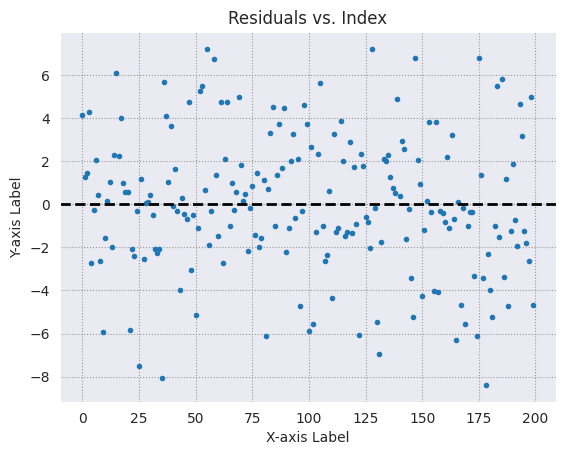

In [ ]:
plt.plot(index_res, residuos, ".")
plt.axhline(y=0, linestyle='--', color='black', lw=2)  # Add a horizontal dashed line at y = 0

# Add labels and a title if needed
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Residuals vs. Index')

In [ ]:
from scipy.stats import wilcoxon
test_wilcoxon = wilcoxon(residuos)
test_wilcoxon.statistic, test_wilcoxon.pvalue

(10049.0, 0.9990264452910839)

##### Comparando el p_value del test de wilcoxon con un nivel de significancia del 0.05, no hay suficiente evidencia para rechazar Ho: La E(errores) = 0

#### 4. Varianza constante

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

### H0: E_i son homocedasticos
### H1: E_i no son homocedasticos (Son heterosedasticos)
test = sms.het_breuschpagan(results.resid, results.model.exog)
name = ["Lagrange multiplier statistic", "p-value", "f-value", "f p-value"]
lzip(name, test)

[('Lagrange multiplier statistic', 48.037965662293615),
 ('p-value', 4.1804559077556965e-12),
 ('f-value', 62.591404771514306),
 ('f p-value', 1.7618451425695673e-13)]

##### El p_value de la prueba de Breusch Pagan comparado con un nivel de significancia de 0.05  el p_value es menor, por lo tanto se rechaza la Ho: Los errores son homocedasticos, este supuesto no se cumple.

In [ ]:
new_data = np.array([[1,5],[1,6]])
new_data = sm.add_constant(new_data)

#### Punto 4D
Teniedo en cuenta el punto anterior, elija solo una variable explicativa (“TV”, “Radio”, o
“Newspaper”; la más conveniente) para modelar las ventas (“Sales”), ajuste el modelo de
regresión lineal simple y encuentra la ecuación de la recta. ¿Cuál es el valor del coeficiente
de determinación R2? ¿Cómo se interpreta este valor?

In [ ]:
# Calcular el intervalo de confianza de predicción para las nuevas observaciones
predicciones = results.get_prediction(new_data)
intervalo_confianza_prediccion = predicciones.conf_int(alpha=0.05)  # 0.05 corresponde a un nivel de confianza del 95%
print(intervalo_confianza_prediccion)

[[6.3902261  8.15032741]
 [6.44230239 8.19332439]]


El intervalo de confianza para la predición Sales dado 5 anuncios en TV es:
$IC_{0.95} = [6.3902261, 8.15032741]$

### Punto 5

Se desea predecir la resistencia a la compresión del concreto (Concrete compressive strength)
en función de diferentes variables predictoras como el cemento (Cement), la escoria (Slag), la
ceniza volante (Fly ash), el agua (Water), el superplastificante (Superplasticizer), el agregado
grueso (Coarse aggregate) y el agregado fino (Fine aggregate). Para ello se dispone de un
conjunto de datos con 1030 observaciones. Se desea construir un modelo de regresión lineal múltiple

###Punto 5A
 Cargar los datos del archivo “Concrete_Data.xls” y examinar las características del conjunto de datos.

 * Se carga el dataset
 * Se elimina la variable Age, que no se considera en la estimación.

In [ ]:
concrete = pd.read_excel('/content/Concrete_Data.xls')
concrete.drop('Age (day)', axis = 1, inplace = True)

* Se examina que todas las variables tienen el tipo correcto y ninguna columna tiene datos faltantes.

In [ ]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Concrete compressive strength(MPa, megapascals)        1030 non-null   float64
dtypes: float64(8)
memory usage: 64.5 KB


***Con respecto a las estadísticas descriptivas se encuentra que:***
 * El valor promedio de Cemento es de 281 y su valor mediano es de 272.
 * El valor promedio de Escoria es de 73 y su valor mediano es de 22.
 * El valor promedio de la Ceniza volante es de 54 y su valor mediano es de 0. Este valor debe revisarse si es una inconsistencia en el dataset o efectivamente es correcto que al menos el 50% de la variable sea cero.
 * El valor promedio del Agua es de 181 y su valor mediano es de 185.
 * El valor promedio del Superplastificante es de 6.2 y su valor mediano es de 6.35.
 * El valor promedio del Agregado grueso es de 973 y su valor mediano es de 968.
 * El valor promedio del Agregado fino es de 773 y su valor mediano es de 779.
 * Por último la variable respuesta Resistencia a la compresión del concreto tiene un valor promedio de 36 y un valor mediano de 34.

In [ ]:
round(concrete.describe()[np.array([False, True,True,True,True,True,True,True])].T,2) ## Summary de las variables sin el conteo, ya sabemos que existen 1030 observaciones.

,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),281.17,104.51,102.00,192.38,272.90,350.00,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),73.90,86.28,0.00,0.00,22.00,142.95,359.4
Fly Ash (component 3)(kg in a m^3 mixture),54.19,64.00,0.00,0.00,0.00,118.27,200.1
Water (component 4)(kg in a m^3 mixture),181.57,21.36,121.75,164.90,185.00,192.00,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),6.20,5.97,0.00,0.00,6.35,10.16,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),972.92,77.75,801.00,932.00,968.00,1029.40,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),773.58,80.18,594.00,730.95,779.51,824.00,992.6
"Concrete compressive strength(MPa, megapascals)",35.82,16.71,2.33,23.71,34.44,46.14,82.6


* Se modifica el nombre de las variable para mejor visualización de gráficos, puesto que los nombres son muy largos.

In [ ]:
concrete.columns = ['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Concrete compressive strength']

* Histogramas

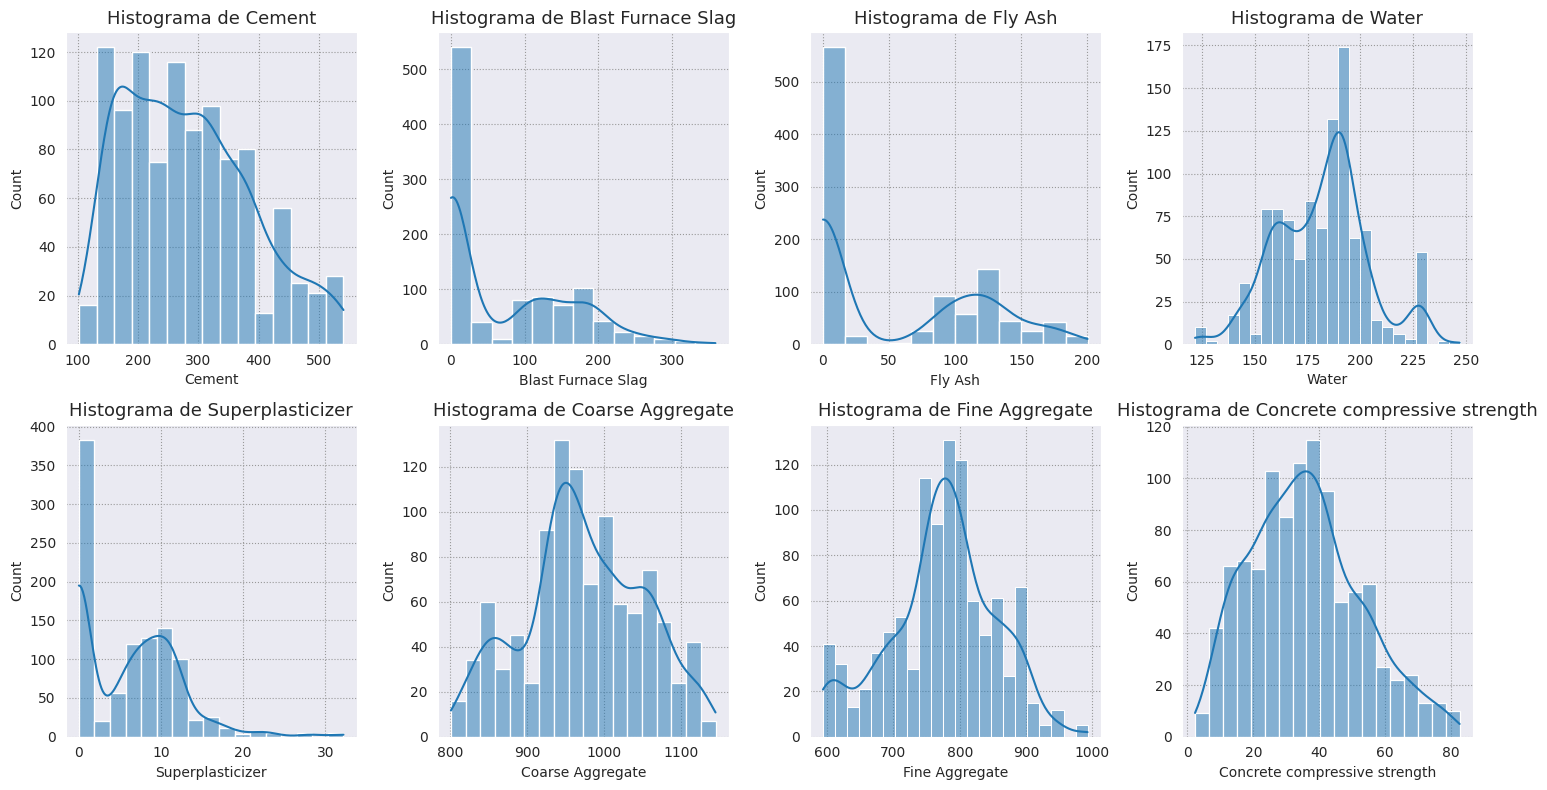

In [ ]:
f = plt.figure( figsize = (15,8))
for i, j  in enumerate(['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate', 'Concrete compressive strength']):
    f.add_subplot(2,4,i + 1)
    sns.histplot(concrete[j], kde = True)
    plt.title(f'Histograma de {j}', size = 13)
f.tight_layout()

### Punto 5B
Realizar un análisis exploratorio de los datos para entender la relación entre las variables predictoras y la variable respuesta.


 * Graficamente no se observa ninguna tendencia lineal con las variables, a excepción de la variable ***Cemento*** donde pareciese existir un patrón de dependencia positivo.

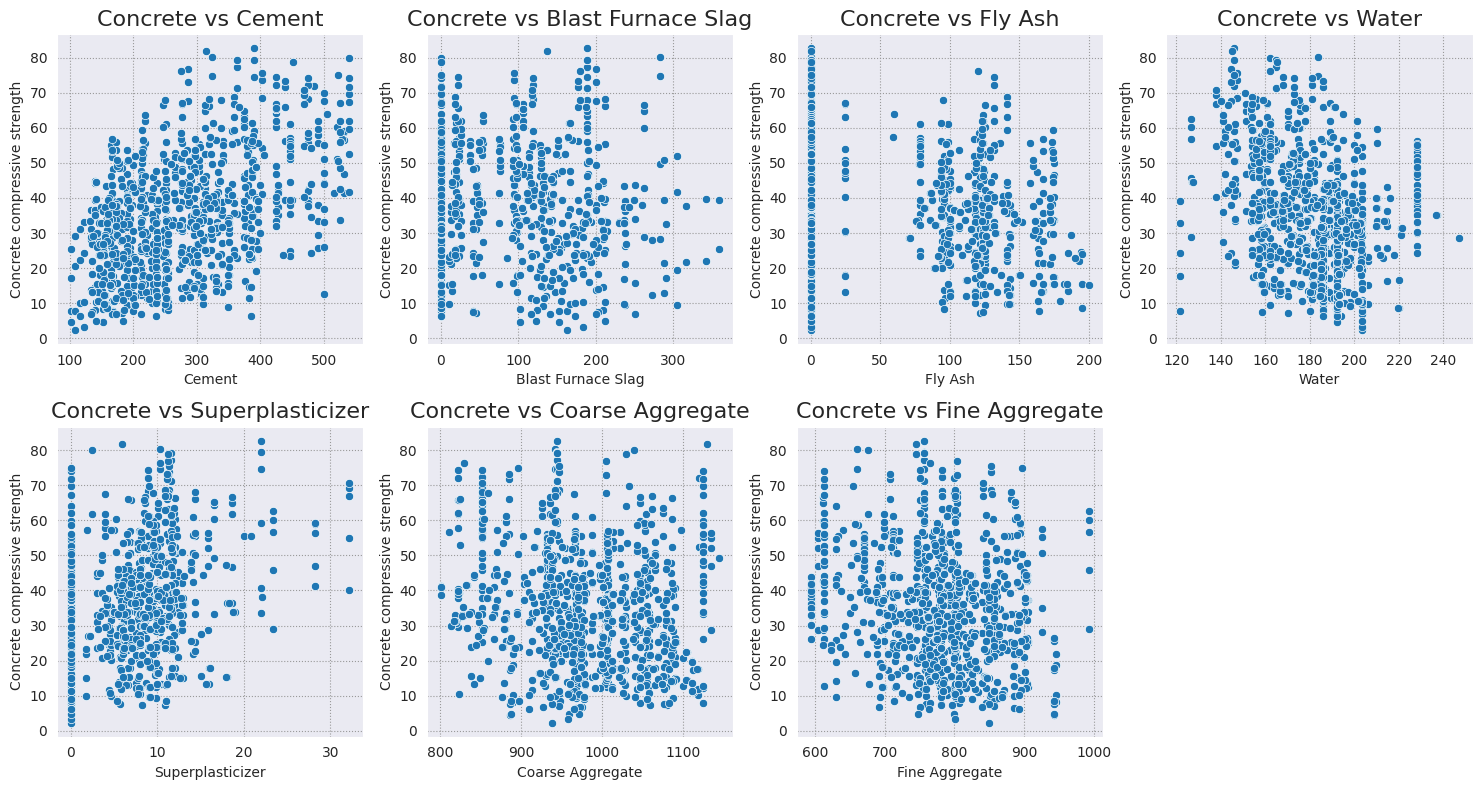

In [ ]:
f = plt.figure( figsize = (15,8))
for i, j  in enumerate(['Cement','Blast Furnace Slag','Fly Ash','Water', 'Superplasticizer','Coarse Aggregate', 'Fine Aggregate']):
    f.add_subplot(2,4,i + 1)
    sns.scatterplot(data = concrete, x = j, y = 'Concrete compressive strength')
    plt.title(f'Concrete vs {j}', size = 16)
f.tight_layout()

* Para cuantificar los niveles de dependencia entre las variables se calculan la correlaciones por los métodos de Pearson, Spearman y Kendall

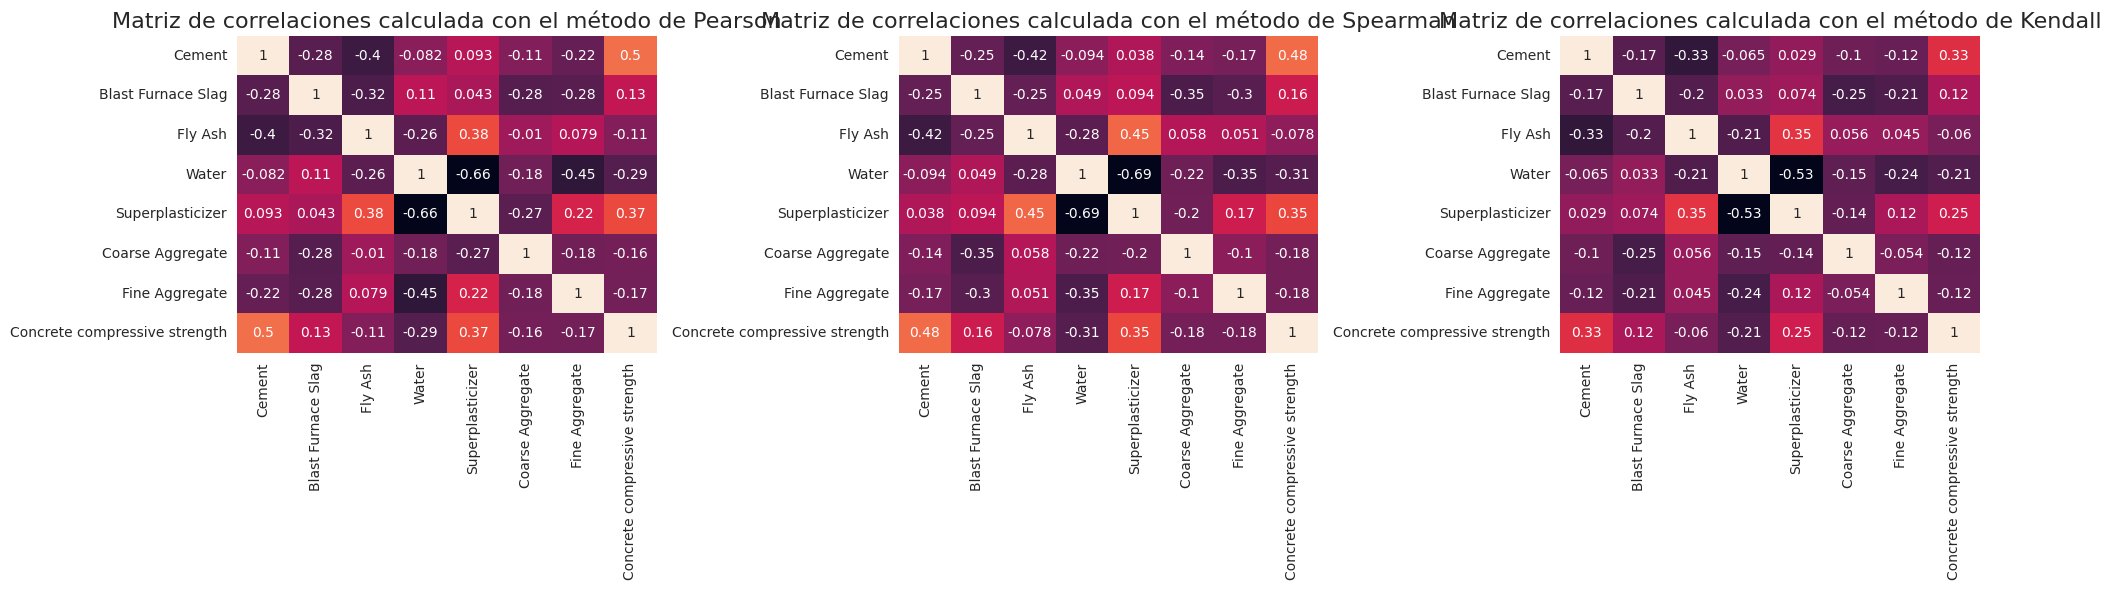

In [ ]:
f1 = plt.figure(figsize = (20,6))
for i, j in enumerate(['pearson','spearman','kendall']):
    f1.add_subplot(1,3, i + 1)
    sns.heatmap(concrete.corr(method=j), annot = True, cbar = False)
    plt.title(f'Matriz de correlaciones calculada con el método de {j.capitalize()}', size = 16)
f1.tight_layout()

Con base a la matriz de correlaciones calculada por los distintos métodos, se encuentra lo siguiente:
> Correlación de Pearson ($\rho$):
> * Sólo la variable ***Cemento*** alcanza una relación positiva y moderada con la variable dependiente, el resto de variables tienen relación baja y la relación con la variable ***Fly Ash*** es casi cero.

> Correlación de Spearman ($\rho$):
> * Las correlaciones tienen valores muy similares a las calculadas con Pearson, la única variable que alcanza una relación moderada es ***Cemento*** y el resto se mantienen bajas.

> Correlación de Kendall ($\tau$):
> * De las correlaciones calculadas por Kendall ninguna variable alcanza a tener una relación moderada con la variable dependiente.

### Punto 5C
Entrenar un modelo de regresión lineal múltiple utilizando el conjunto de datos y evalúe si hay significancia en el modelo.

* Se definen la variable respuesta y predictoras.

In [ ]:
y = concrete['Concrete compressive strength']
x = concrete.drop('Concrete compressive strength', axis = 1)

* Del siguiente resumen del modelo con todas las variables contempladas se puede encontrar que:

 >* Los coeficientes de las variables en su conjunto sí son significativos (Prob (F-statistic) < 0.05), es decir, sí existe modelo lineal.
 >* Para un nivel de significancia del 5% los coeficientes que no fueron significativos fueron los de las variables Coarse Agreggate y Fine Aggregate.
 >* El estadístico del DW se sale del intervalo de no rechazo de H0, lo que permite inferir que los errores no son independientes.
 >* Con respecto a la normalidad de los errores, el estadístico de prueba Jarque-Bera indica que los errores no se distribuyen de manera normal.
 >* El R2 fue de 0.449. Lo que implica que un 44.9% de la variabilidad de la variable dependiente es explicada por las variables regresoras.
 >* El número de condición es grande lo que puede indicar de multicolinealidad en las variables regresoras.

In [ ]:
X = sm.add_constant(x)
modelo1 = sm.OLS(y, X)
resultado1 = modelo1.fit()
print(resultado1.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.449
Model:                                       OLS   Adj. R-squared:                  0.445
Method:                            Least Squares   F-statistic:                     118.8
Date:                           Fri, 13 Oct 2023   Prob (F-statistic):          1.80e-127
Time:                                   21:08:24   Log-Likelihood:                -4054.6
No. Observations:                           1030   AIC:                             8125.
Df Residuals:                               1022   BIC:                             8165.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

### Punto 5D
Analizar la significancia estadística de las variables predictoras y construir un modelo de regresión lineal múltiple reducido con las variables significativas. Revise su desempeño con respecto al modelo completo revisando el Adj − R2 y los criterios de información de Akaike y de Bayes (AIC y BIC).

* Variables significativas en el modelo ajustado con todas las variables

In [ ]:
vars_signf = resultado1.pvalues[resultado1.pvalues < 0.05].index.values ## Se obtiene el nombre de las variables que fueron significativas
x = concrete[vars_signf]
y = concrete['Concrete compressive strength']

* Modelos ajustado

In [ ]:
X = sm.add_constant(x)
model_adj = sm.OLS(y, X)
resultado2 = model_adj.fit()
print(resultado2.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.448
Model:                                       OLS   Adj. R-squared:                  0.445
Method:                            Least Squares   F-statistic:                     166.1
Date:                           Fri, 13 Oct 2023   Prob (F-statistic):          2.44e-129
Time:                                   21:08:24   Log-Likelihood:                -4055.4
No. Observations:                           1030   AIC:                             8123.
Df Residuals:                               1024   BIC:                             8152.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

* ***Desempeño del modelo completo vs el modelo reducido.***


|Métrica| Modelo completo | Modelo reducido |
|:----:| :-----------: | :-----------: |
| AIC | 8125.2 |8122.8 |
| BIC | 8164.7 |8152.5 |
|R2-Adj | 0.445|0.445 |


<br>

> * El modelo reducido es preferible al modelo completo puesto que tiene tanto un AIC como un BIC menor al modelo completo.
> * Con respecto R2 ajustado es igual para ambos modelos.



### Punto 5E
Valide los supuestos del modelo ($ε_i \overset{\text{iid}}{\sim} N(0, σ2)$) y en caso de no cumplir alguno, proponga una solución. Evalúe la conveniencia de usar un enfoque robusto en este caso.


**Validación de los supuestos sobre los residuales del modelo reducido $\hat{\epsilon_i}$**
 > *Autocorrelación serial*
 >    *  Prueba DW: El estadístico DW (1.211) recae por la zona de rechazo de H0, lo que implica que los errores no son independientes.
 >    * Prueba gráfica: De manera gráfica se plotean los $\hat{\epsilon_i}$ vs $\hat{\epsilon_{i-1}}$ y se encuentra cierto patrón de asociación positiva lo que ya había confirmado la prueba DW.

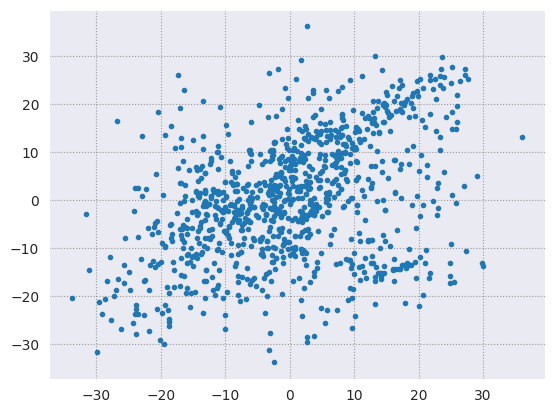

In [ ]:
## Gráfica de autocorrelación de primer orden de los errores
plt.plot(resultado2.resid[:-1],resultado2.resid[1:],'.')
plt.show()

 >*Distribución normal*
 >    * Jarque-Bera : El p_value (0.014) de este estadístico es menor al nivel de significancia (0.05) por lo que se rechaza la hipótesis nula de normalidad de los errores.
 >    * Graficamente en el QQPlot se ve que en el centro los errores siguen la linea de la distribución teórica, pero en la colas se desvían.
 >    * Los errores tienen media cero, lo que se comprueba con la prueba ttest_1samp, en la cual no se rechaza la H0 de que $\mu= 0$

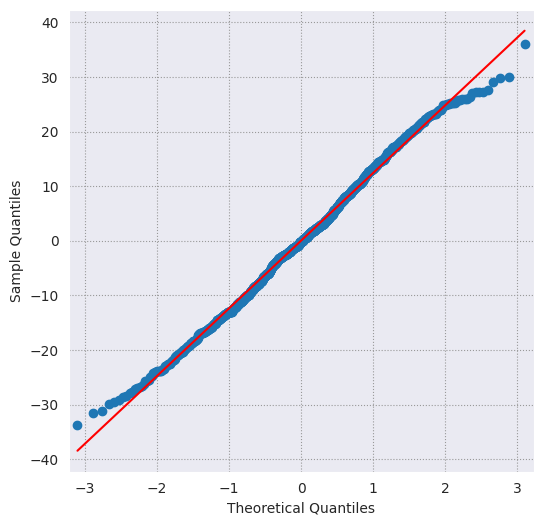

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
qqplot(resultado2.resid, line = 's', ax = ax)
plt.show()

In [ ]:
kstest(resultado2.resid, 'norm')

KstestResult(statistic=0.4178653337562432, pvalue=1.944012562045305e-163, statistic_location=-2.2814512270981453, statistic_sign=1)

* Los errores tienen media cero. ***Este supuesto sí se cumple.***

In [ ]:
ttest_1samp(resultado2.resid, popmean = 0)[1]

0.9999999999999044

 > *Homocedasticidad*
 >    * El p_value (1.55 e-13) asociado al estadístico de Breusch-Pagan es menor al nivel de significancia (0.05) por lo que se rechaza la hipótesis nula de varianza constante de los errores.

In [ ]:
### Breusch Pagan Test
sm.stats.diagnostic.het_breuschpagan(resultado2.resid, resultado2.model.exog)[-1] ## el p_value es el último valor

1.5536911783441337e-13

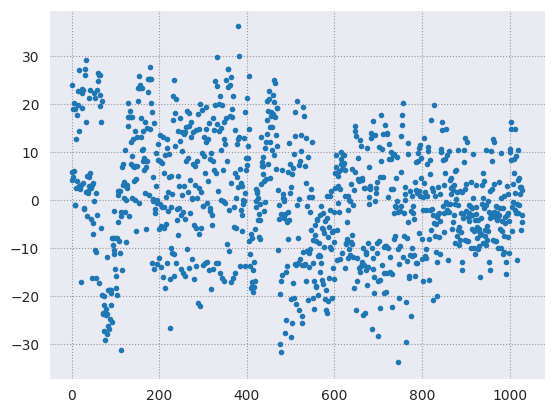

In [ ]:
plt.plot(resultado2.resid,'.')
plt.show()

* En las anteriores celdas se encontró que se violan los supuestos sobre los errores: la autocorrelación, la normalidad y la homocedasticidad.
* Además sobre las variables independientes se encontró multicolinealidad. Para esto se va a calcular el Factor de Inflación de Varianza y eliminar la variable que mayor contribución tenga.

In [ ]:
def calc_vif(X): ## Se define la función para calcular la VIF
    vif = pd.DataFrame()
    vif['variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return (vif)

In [ ]:
calc_vif(x).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Water,19.731307
0,Cement,14.231885
4,Superplasticizer,3.840886
2,Fly Ash,3.828291
1,Blast Furnace Slag,2.993109


* Obtenemos el nombre de cuál es la variable que más infla la varianza, se elimina y se calcula de nuevo el modelo.

In [ ]:
vble_most_vif = calc_vif(x).sort_values(by = 'VIF').iloc[-1,0]

* El modelo sigue teniendo problemas de multicolinealidad.

In [ ]:
X = sm.add_constant(x)
X.drop(labels = vble_most_vif , axis = 1, inplace = True) ## Se elimina la variable que más VIF tenía.
modelo_adj3 = sm.OLS(y, X)
resultado3 = modelo_adj3.fit()
print(resultado3.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.435
Model:                                       OLS   Adj. R-squared:                  0.433
Method:                            Least Squares   F-statistic:                     197.2
Date:                           Fri, 13 Oct 2023   Prob (F-statistic):          2.08e-125
Time:                                   21:08:25   Log-Likelihood:                -4067.3
No. Observations:                           1030   AIC:                             8145.
Df Residuals:                               1025   BIC:                             8169.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

* De acuerdo al resumen que nos muestra la regresión de la anterior celda sin la variable Water sigue existiendo multicolinealidad. Se calcula de nuevo el VIF para ver si sigue existiendo problemas de multicolinealidad y ninguna variable tiene un valor mayor a 5.

In [ ]:
calc_vif(x.drop(labels = 'Water', axis = 1)).sort_values(by = 'VIF', ascending = False)

,variables,VIF
3,Superplasticizer,2.815431
0,Cement,2.189177
2,Fly Ash,1.859278
1,Blast Furnace Slag,1.506098


* Se plantea realizar una transformación logarítmica en la variable dependiente y se examinará si se logran cumplir los supuestos en los residuales.

In [ ]:
X = sm.add_constant(x)
X.drop(labels = vble_most_vif , axis = 1, inplace = True)
modelo_ytransf = sm.OLS(np.log(y), X)
resultado_ytransf = modelo_ytransf.fit()
print(resultado_ytransf.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     157.5
Date:                Fri, 13 Oct 2023   Prob (F-statistic):          4.69e-105
Time:                        21:11:59   Log-Likelihood:                -600.93
No. Observations:                1030   AIC:                             1212.
Df Residuals:                    1025   BIC:                             1237.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.1067      0

* En este nuevo modelo se observa que el único supuesto que logra cumplirse es el de autocorrelación serial con un DW (1.518) que recae en el rango de 1.5 y 2.5, el resto de supuestos siguen sin cumplirse.

* Los errores no siguen una distribución normal, JB p_value (2.83e-25)

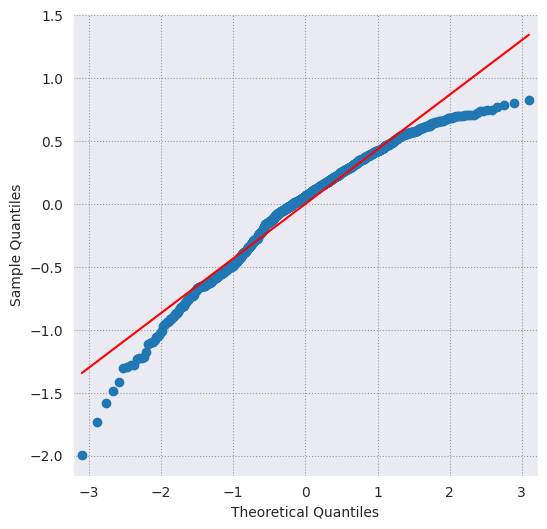

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
qqplot(resultado_ytransf.resid, line = 's', ax = ax)
plt.show()

* Se sigue incumpliendo el supuesto de homocedasticidad p_value(2.004e-12)

In [ ]:
### Breusch Pagan Test
sm.stats.diagnostic.het_breuschpagan(resultado_ytransf.resid, resultado_ytransf.model.exog)[-1] ## el p_value es el último valor

2.0041663399612067e-12

* Finalmente cuando fallan todos los supuestos del modelo clásico de regresión y no mejoran con transformaciones en las variables se opta por realizar una regresión robusta, que al penalizar puede mejorar la estimación. No obstante cabe aclarar que aunque la regresión robusta mejore la estimación, no va a corregir el problema de multicolinealidad de las variables independientes.

* **Regresión Robusta**

In [ ]:
X = sm.add_constant(x)
X.drop(labels = vble_most_vif , axis = 1, inplace = True)
modelo_robust = sm.RLM(y, X)
resultado_robust = modelo_robust.fit()
print(resultado_robust.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                 1030
Model:                            RLM   Df Residuals:                     1025
Method:                          IRLS   Df Model:                            4
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 13 Oct 2023                                         
Time:                        21:11:42                                         
No. Iterations:                    13                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -6.5170      2

* Finalmente se realiza una comparación de los coeficientes estimados por regresión y regresión robusta. Se observa que la regresión robusta le da una mayor importancia a los coeficientes de Cement, Blast Furnace Slag y Fly Ash pero le resta importancia al coeficiente de la variables Superplasticizer.

In [ ]:
betas = pd.DataFrame([resultado3.params.values,resultado_robust.params.values], columns = resultado_robust.params.index).T
betas.columns = ['OLS', 'OLS_Robusta']
betas

,OLS,OLS_Robusta
const,-5.363794,-6.516982
Cement,0.104719,0.107942
Blast Furnace Slag,0.071200,0.072577
Fly Ash,0.050047,0.051232
Superplasticizer,0.606965,0.600220


### Anexos - Scripts paper GLM
En la siguiente sección se desarrolla la comparación de resultados empleando un modelo lineal y un modelo lineal generalizado.

In [ ]:
y = concrete['Concrete compressive strength'].values

In [ ]:
## Se comprueba la normalidad de la variable
jarque_bera(y)

SignificanceResult(statistic=34.09671265226641, pvalue=3.9445087341825074e-08)

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,0.002714,951.846193,966.658135,inf,0.034597,1.659083e-01
chi2,0.002714,951.846258,966.658201,inf,0.034597,1.659080e-01
norm,0.002863,959.242237,969.116866,inf,0.041326,5.766362e-02
expon,0.011218,945.929860,955.804488,inf,0.227750,1.944048e-47


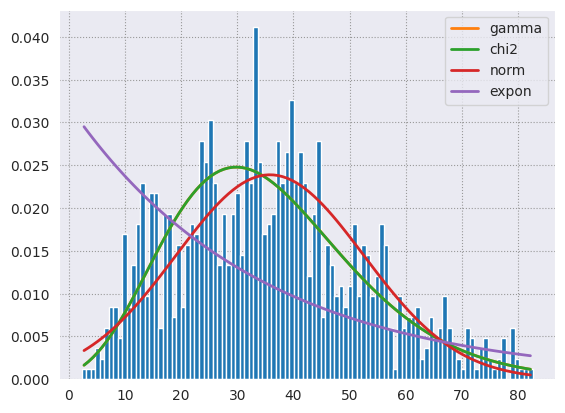

In [ ]:
## Se ajusta la distribución a la variable y
f = Fitter(y, distributions = ['gamma', 'norm','chi2','expon'])
f.fit()
f.summary()

In [ ]:
## Se ajusta el modelo GLM
gamma_model = sm.GLM(y,X,  family=sm.families.Gamma(sm.families.links.log()))
gamma_model.fit()
results_gamma = gamma_model.fit()
print(results_gamma.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1030
Model:                            GLM   Df Residuals:                     1025
Model Family:                   Gamma   Df Model:                            4
Link Function:                    log   Scale:                         0.14482
Method:                          IRLS   Log-Likelihood:                -4113.9
Date:                Fri, 13 Oct 2023   Deviance:                       173.41
Time:                        21:12:52   Pearson chi2:                     148.
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4728
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.3090      0

In [ ]:
### RESULTADOS DEL OLS
print(resultado3.summary())

                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.435
Model:                                       OLS   Adj. R-squared:                  0.433
Method:                            Least Squares   F-statistic:                     197.2
Date:                           Fri, 13 Oct 2023   Prob (F-statistic):          2.08e-125
Time:                                   21:12:54   Log-Likelihood:                -4067.3
No. Observations:                           1030   AIC:                             8145.
Df Residuals:                               1025   BIC:                             8169.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

In [ ]:
print(f'Modelo GLM JB (p_value): {round(jarque_bera(residuals_gamma)[1],3)} \nModelo OLS JB (p_value): {round(jarque_bera(resultado3.resid)[1],3)}')
print(f'Modelo GLM Wilcoxon (p_value): {round(wilcoxon(residuals_gamma)[1],3)} \nModelo OLS Wilcoxon (p_value): {round(wilcoxon(resultado3.resid)[1],3)}')
print(f'Modelo GLM DW (p_value): {round(durbin_watson(residuals_gamma),5)} \nModelo OLS DW (p_value): {round(durbin_watson(resultado3.resid),5)}')
print(f'Modelo GLM Breusch-Pagan (p_value): {sm.stats.diagnostic.het_breuschpagan(residuals_gamma, X)[-1]} \nModelo OLS Breusch-Pagan (p_value): {sm.stats.diagnostic.het_breuschpagan(resultado3.resid, X)[-1]}')

Modelo GLM JB (p_value): 0.601 
Modelo OLS JB (p_value): 0.004
Modelo GLM Wilcoxon (p_value): 0.633 
Modelo OLS Wilcoxon (p_value): 0.686
Modelo GLM DW (p_value): 1.21067 
Modelo OLS DW (p_value): 1.22086
Modelo GLM Breusch-Pagan (p_value): 1.1530896892192108e-17 
Modelo OLS Breusch-Pagan (p_value): 3.6933090168748995e-10


<center>

|Supuesto|Test| Modelo OLS (p_value) | Modelo GLM (p_value) |
|:----:|:----:| :-----------: | :-----------: |
|Independencia de los errores| Durbin-Watson |1.211 |1.21067|
|Normalidad de los errores| Jarque-Bera | 0.004|0.601|
|Media cero|Wilcoxon | 0.686|0.633 |
|Homocedasticidad|Breusch-Pagan |3.69330e-10 |1.15308e-17 |

</center>

In [ ]:
## SE CALCULAN LOS RESIDUALES
residuals_gamma = np.array(y - results_gamma.predict(X))

In [ ]:
results_gamma.aic

8237.725234850202

In [ ]:
resultado3.aic

8144.600640350558

In [ ]:
## RMSE
RMSE_GLM = np.sqrt(((residuals_gamma)**2).mean())
RMSE_OLS = np.sqrt(((resultado3.resid)**2).mean())
RMSE_GLM, RMSE_OLS

(13.024889146992917, 12.552209791747714)

|Métrica| Modelo OLS | Modelo GLM |
|:-----:| :-----------: | :-----------: |
|AIC|8144 | 8237 |
|RMSE|12.55 |13.02|

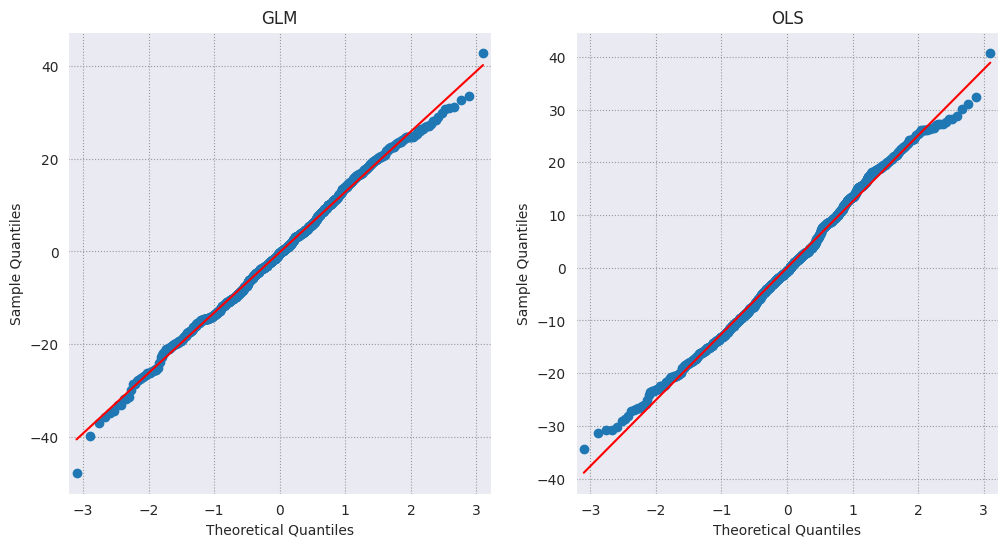

In [ ]:
## COMPARACIÓN DE RESIDUALES DE LAS 2 ESTIMACIONES
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,6))
qqplot(residuals_gamma, line = 's', ax = ax1)
ax1.set_title('GLM')
qqplot(resultado3.resid, line = 's', ax = ax2)
ax2.set_title('OLS')
plt.show()